In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [9]:
happiness2021 = pd.read_csv('2021 data.csv')
happiness2021.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Albania,Central and Eastern Europe,5.117,0.059,5.234,5.001,9.520,0.697,68.999,0.785,-0.030,0.901,2.43,1.008,0.529,0.646,0.491,0.168,0.024,2.250
1,Bosnia and Herzegovina,Central and Eastern Europe,5.813,0.050,5.911,5.715,9.590,0.870,68.098,0.706,0.113,0.931,2.43,1.032,0.919,0.618,0.395,0.261,0.005,2.583
2,Bulgaria,Central and Eastern Europe,5.266,0.054,5.371,5.160,10.016,0.931,67.000,0.788,-0.096,0.932,2.43,1.181,1.055,0.583,0.494,0.125,0.005,1.823
3,Croatia,Central and Eastern Europe,5.882,0.048,5.975,5.788,10.217,0.924,70.799,0.754,-0.118,0.939,2.43,1.251,1.039,0.703,0.453,0.111,0.000,2.325
4,Czech Republic,Central and Eastern Europe,6.965,0.049,7.062,6.868,10.556,0.947,70.807,0.858,-0.208,0.868,2.43,1.370,1.090,0.703,0.580,0.052,0.046,3.124


In [10]:
print("Data type : ", type(happiness2021))
print("Data dims : ", happiness2021.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (149, 20)


In [ ]:
print(happiness2021.dtypes)

In [13]:
happiness2021_updated = happiness2021.drop(['Standard error of ladder score', 'upperwhisker', 'lowerwhisker', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Ladder score in Dystopia', 'Dystopia + residual'], axis=1)

The reason why we are dropping these columns is because we want to analyse how different factors affect ladder score, and these columns are not useful in the analysis

In [14]:
happiness2021_updated.head()

,Country name,Regional indicator,Ladder score,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,Albania,Central and Eastern Europe,5.117,1.008,0.529,0.646,0.491,0.168,0.024
1,Bosnia and Herzegovina,Central and Eastern Europe,5.813,1.032,0.919,0.618,0.395,0.261,0.005
2,Bulgaria,Central and Eastern Europe,5.266,1.181,1.055,0.583,0.494,0.125,0.005
3,Croatia,Central and Eastern Europe,5.882,1.251,1.039,0.703,0.453,0.111,0.000
4,Czech Republic,Central and Eastern Europe,6.965,1.370,1.090,0.703,0.580,0.052,0.046


In [15]:
combined2021 = pd.DataFrame(happiness2021_updated[["Ladder score", "Explained by: Log GDP per capita", "Explained by: Social support", "Explained by: Healthy life expectancy", "Explained by: Freedom to make life choices", "Explained by: Generosity"]])

# Summary Statistics for all Variables
combined2021.describe()

,Ladder score,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,0.977161,0.793315,0.520161,0.498711,0.178047
std,1.073924,0.404740,0.258871,0.213019,0.137888,0.098270
min,2.523000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.852000,0.666000,0.647000,0.357000,0.409000,0.105000
50%,5.534000,1.025000,0.832000,0.571000,0.514000,0.164000
75%,6.255000,1.323000,0.996000,0.665000,0.603000,0.239000
max,7.842000,1.751000,1.172000,0.897000,0.716000,0.541000


C:\Users\anusr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\anusr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\anusr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

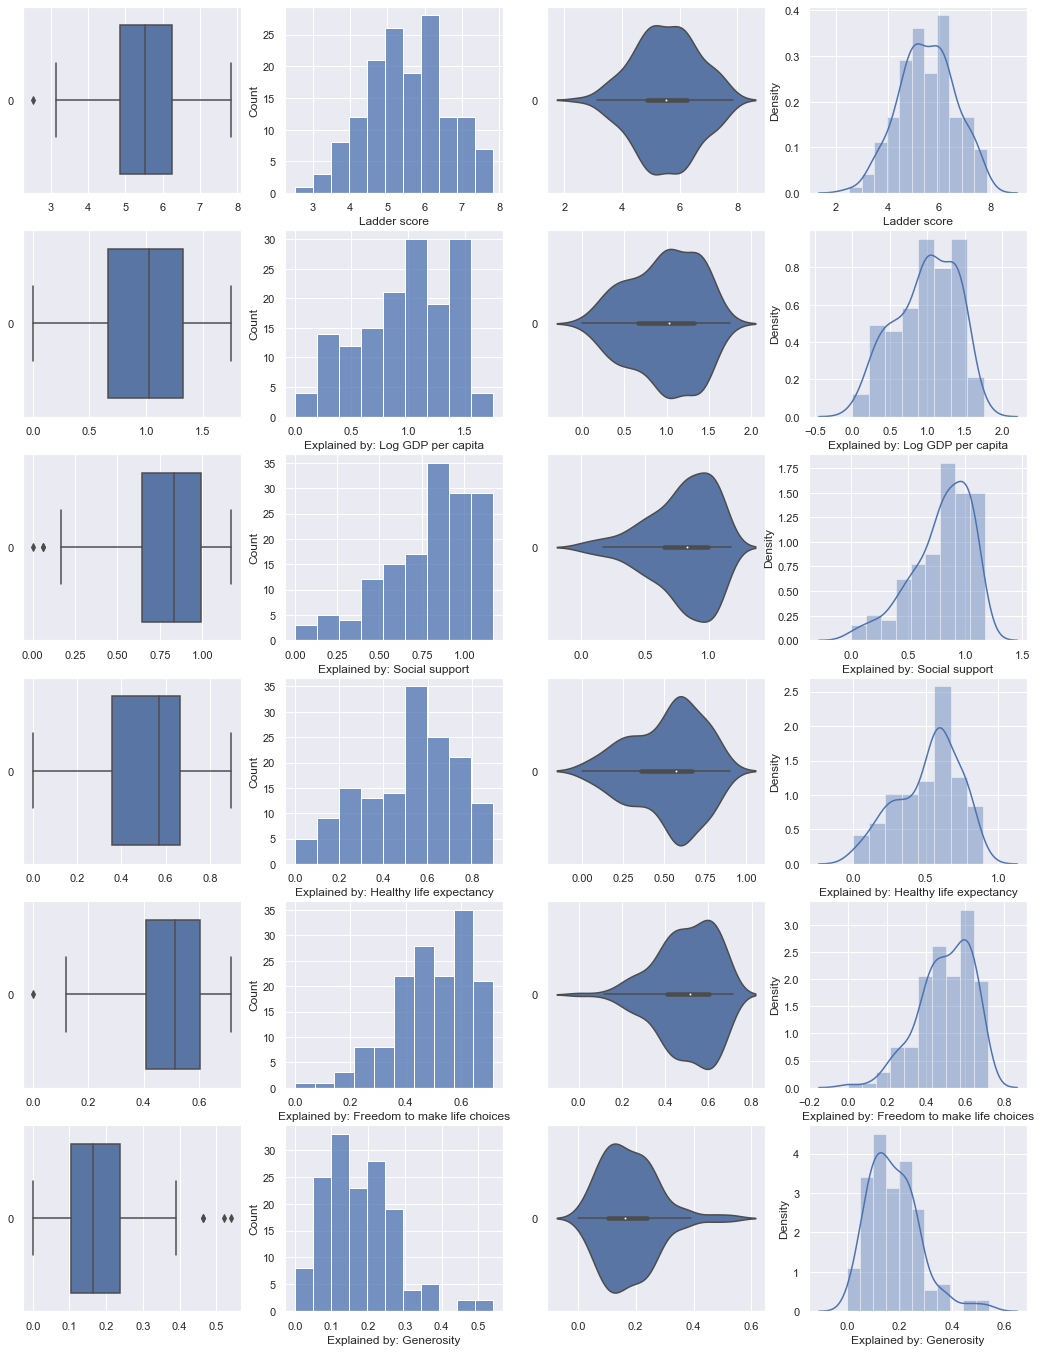

In [16]:
f, axes = plt.subplots(6, 4, figsize=(18, 24))

count = 0
for var in combined2021:
    sb.boxplot(data = happiness2021_updated[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = happiness2021_updated[var], ax = axes[count,1])
    sb.violinplot(data = happiness2021_updated[var], orient = "h", ax = axes[count,2])
    sb.distplot(happiness2021_updated[var], ax = axes[count, 3])
    count += 1

In [17]:
happiness2020 = pd.read_csv('2020 data.csv')
happiness2020.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Albania,Central and Eastern Europe,4.8827,0.056116,4.992687,4.772713,9.417931,0.671070,68.708138,0.781994,-0.042309,0.896304,1.972317,0.906653,0.830484,0.846330,0.461946,0.171028,0.025361,1.640897
1,Bosnia and Herzegovina,Central and Eastern Europe,5.6741,0.046386,5.765017,5.583183,9.455817,0.829204,67.808136,0.651353,0.098275,0.933769,1.972317,0.918395,1.203987,0.813928,0.305366,0.264005,0.001172,2.167242
2,Bulgaria,Central and Eastern Europe,5.1015,0.044221,5.188173,5.014827,9.869319,0.937840,66.803978,0.745178,-0.143908,0.935585,1.972317,1.046555,1.460579,0.777777,0.417820,0.103834,0.000000,1.294961
3,Croatia,Central and Eastern Europe,5.5047,0.037784,5.578756,5.430644,10.070875,0.874624,70.214905,0.714839,-0.128538,0.916495,1.972317,1.109024,1.311265,0.900576,0.381457,0.113999,0.012325,1.676029
4,Czech Republic,Central and Eastern Europe,6.9109,0.042891,6.994967,6.826833,10.404163,0.914431,70.047935,0.818537,-0.230862,0.858446,1.972317,1.212322,1.405287,0.894564,0.505745,0.046326,0.049803,2.796808


In [18]:
print("Data type : ", type(happiness2020))
print("Data dims : ", happiness2020.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (153, 20)


In [19]:
print(happiness2020.dtypes)

Country name                                   object
Regional indicator                             object
Ladder score                                  float64
Standard error of ladder score                float64
upperwhisker                                  float64
lowerwhisker                                  float64
Logged GDP per capita                         float64
Social support                                float64
Healthy life expectancy                       float64
Freedom to make life choices                  float64
Generosity                                    float64
Perceptions of corruption                     float64
Ladder score in Dystopia                      float64
Explained by: Log GDP per capita              float64
Explained by: Social support                  float64
Explained by: Healthy life expectancy         float64
Explained by: Freedom to make life choices    float64
Explained by: Generosity                      float64
Explained by: Perceptions of

In [20]:
happiness2020_updated = happiness2020.drop(['Standard error of ladder score', 'upperwhisker', 'lowerwhisker', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Ladder score in Dystopia', 'Dystopia + residual'], axis=1)

In [21]:
happiness2020_updated.head()

,Country name,Regional indicator,Ladder score,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,Albania,Central and Eastern Europe,4.8827,0.906653,0.830484,0.846330,0.461946,0.171028,0.025361
1,Bosnia and Herzegovina,Central and Eastern Europe,5.6741,0.918395,1.203987,0.813928,0.305366,0.264005,0.001172
2,Bulgaria,Central and Eastern Europe,5.1015,1.046555,1.460579,0.777777,0.417820,0.103834,0.000000
3,Croatia,Central and Eastern Europe,5.5047,1.109024,1.311265,0.900576,0.381457,0.113999,0.012325
4,Czech Republic,Central and Eastern Europe,6.9109,1.212322,1.405287,0.894564,0.505745,0.046326,0.049803


In [22]:
combined2020 = pd.DataFrame(happiness2020_updated[["Ladder score", "Explained by: Log GDP per capita", "Explained by: Social support", "Explained by: Healthy life expectancy", "Explained by: Freedom to make life choices", "Explained by: Generosity"]])

# Summary Statistics for all Variables
combined2020.describe()

,Ladder score,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity
count,153.00000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,5.47324,0.868771,1.155607,0.692869,0.463583,0.189375
std,1.11227,0.372416,0.286866,0.254094,0.141172,0.100401
min,2.56690,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.72410,0.575862,0.986718,0.495443,0.381457,0.115006
50%,5.51500,0.918549,1.203987,0.759818,0.483293,0.176745
75%,6.22850,1.169229,1.387139,0.867249,0.576665,0.255510
max,7.80870,1.536676,1.547567,1.137814,0.693270,0.569814


C:\Users\anusr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\anusr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\anusr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

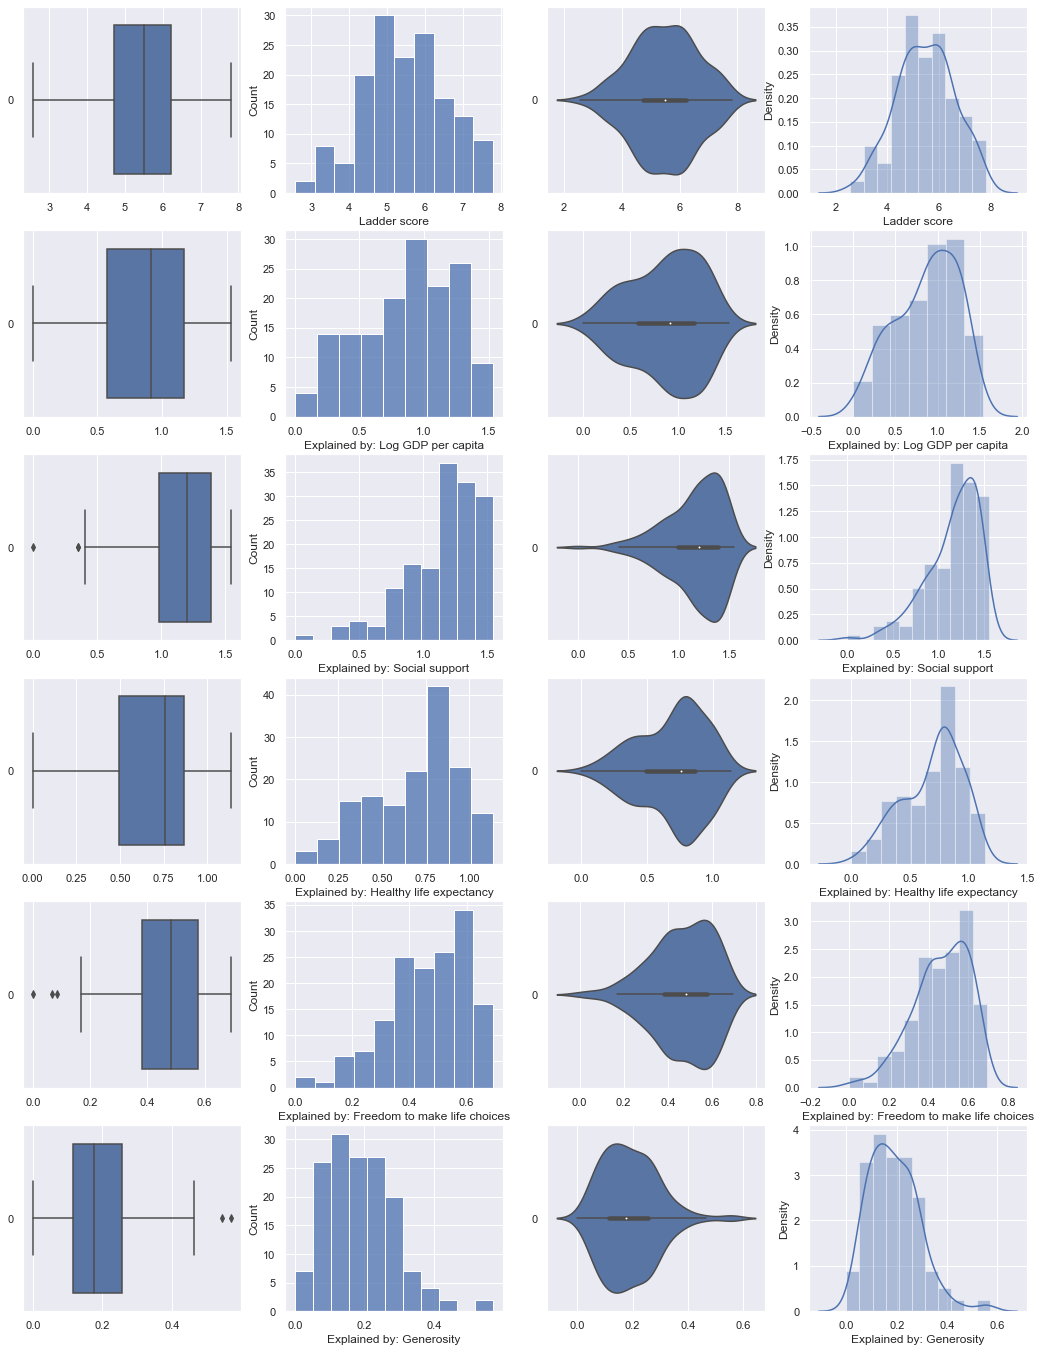

In [23]:
f, axes = plt.subplots(6, 4, figsize=(18, 24))

count = 0
for var in combined2020:
    sb.boxplot(data = happiness2020_updated[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = happiness2020_updated[var], ax = axes[count,1])
    sb.violinplot(data = happiness2020_updated[var], orient = "h", ax = axes[count,2])
    sb.distplot(happiness2020_updated[var], ax = axes[count, 3])
    count += 1

In [25]:
happiness2019 = pd.read_csv('2019 data.csv')
happiness2019.head()

,Overall rank,Country or region,Regional Indicator,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,78,Bosnia and Herzegovina,Central and Eastern Europe,5.386,0.945,1.212,0.845,0.212,0.263,0.006
1,97,Bulgaria,Central and Eastern Europe,5.011,1.092,1.513,0.815,0.311,0.081,0.004
2,75,Croatia,Central and Eastern Europe,5.432,1.155,1.266,0.914,0.296,0.119,0.022
3,20,Czech Republic,Central and Eastern Europe,6.852,1.269,1.487,0.920,0.457,0.046,0.036
4,55,Estonia,Central and Eastern Europe,5.893,1.237,1.528,0.874,0.495,0.103,0.161


In [26]:
print("Data type : ", type(happiness2019))
print("Data dims : ", happiness2019.shape)
print(happiness2019.dtypes)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (156, 10)
Overall rank                      int64
Country or region                object
Regional Indicator               object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object


In [27]:
happiness2019.rename(columns = {'Regional Indicator': 'Regional indicator', 'Country or region':'Country name', 'Score':'Ladder score','GDP per capita':'Explained by: Log GDP per capita', 'Social support':'Explained by: Social support', 'Healthy life expectancy':'Explained by: Healthy life expectancy', 'Freedom to make life choices':'Explained by: Freedom to make life choices', 'Perceptions of corruption':'Explained by: Perceptions of corruption', 'Generosity':'Explained by: Generosity'}, inplace = True)
happiness2019.head()

,Overall rank,Country name,Regional indicator,Ladder score,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,78,Bosnia and Herzegovina,Central and Eastern Europe,5.386,0.945,1.212,0.845,0.212,0.263,0.006
1,97,Bulgaria,Central and Eastern Europe,5.011,1.092,1.513,0.815,0.311,0.081,0.004
2,75,Croatia,Central and Eastern Europe,5.432,1.155,1.266,0.914,0.296,0.119,0.022
3,20,Czech Republic,Central and Eastern Europe,6.852,1.269,1.487,0.920,0.457,0.046,0.036
4,55,Estonia,Central and Eastern Europe,5.893,1.237,1.528,0.874,0.495,0.103,0.161


In [28]:
combined2019 = pd.DataFrame(happiness2019[["Ladder score", "Explained by: Log GDP per capita", "Explained by: Social support", "Explained by: Healthy life expectancy", "Explained by: Freedom to make life choices", "Explained by: Generosity"]])

# Summary Statistics for all Variables
combined2019.describe()

,Ladder score,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846
std,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254
min,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750
50%,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500
75%,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250
max,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000


C:\Users\anusr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\anusr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\anusr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

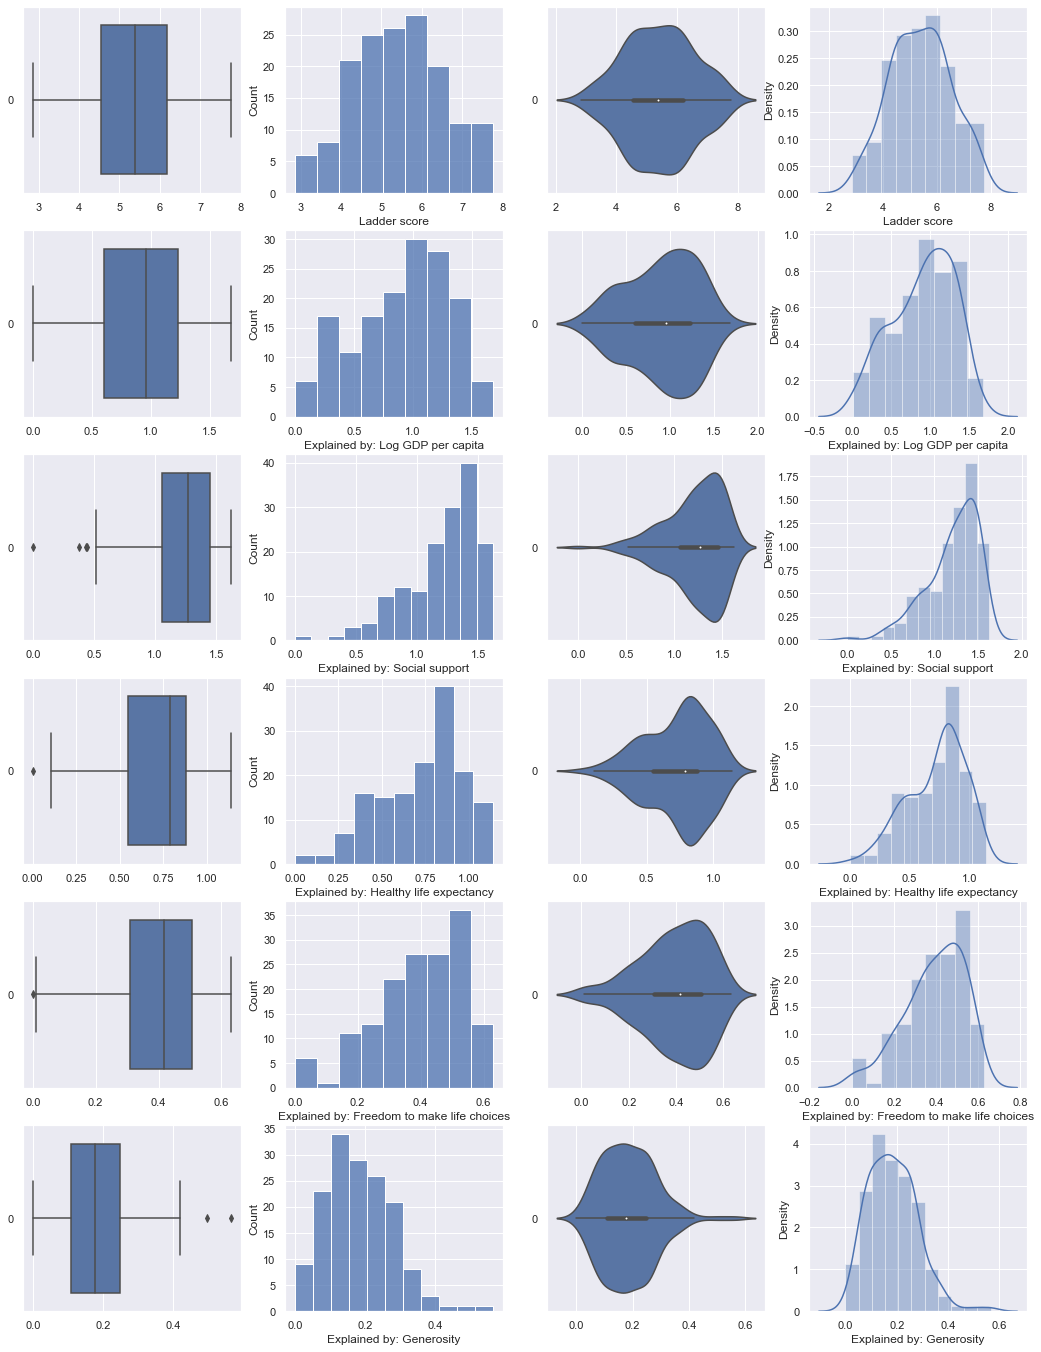

In [30]:
f, axes = plt.subplots(6, 4, figsize=(18, 24))

count = 0
for var in combined2019:
    sb.boxplot(data = happiness2019[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = happiness2019[var], ax = axes[count,1])
    sb.violinplot(data = happiness2019[var], orient = "h", ax = axes[count,2])
    sb.distplot(happiness2019[var], ax = axes[count, 3])
    count += 1

In [31]:
happiness2018 = pd.read_csv('2018 data.csv')
happiness2018.head()

,Overall rank,Country or region,Regional indicator,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,93,Bosnia and Herzegovina,Central and Eastern Europe,5.129,0.915,1.078,0.758,0.280,0.216,0.000
1,100,Bulgaria,Central and Eastern Europe,4.933,1.054,1.515,0.712,0.359,0.064,0.009
2,82,Croatia,Central and Eastern Europe,5.321,1.115,1.161,0.737,0.380,0.120,0.039
3,21,Czech Republic,Central and Eastern Europe,6.711,1.233,1.489,0.854,0.543,0.064,0.034
4,63,Estonia,Central and Eastern Europe,5.739,1.200,1.532,0.737,0.553,0.086,0.174


In [32]:
print("Data type : ", type(happiness2018))
print("Data dims : ", happiness2018.shape)
print(happiness2018.dtypes)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (156, 10)
Overall rank                      int64
Country or region                object
Regional indicator               object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object


In [33]:
happiness2018.rename(columns = {'Country or region':'Country name', 'Score':'Ladder score','GDP per capita':'Explained by: Log GDP per capita', 'Social support':'Explained by: Social support', 'Healthy life expectancy':'Explained by: Healthy life expectancy', 'Freedom to make life choices':'Explained by: Freedom to make life choices', 'Perceptions of corruption':'Explained by: Perceptions of corruption', 'Generosity':'Explained by: Generosity'}, inplace = True)
happiness2019.head()

,Overall rank,Country name,Regional indicator,Ladder score,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,78,Bosnia and Herzegovina,Central and Eastern Europe,5.386,0.945,1.212,0.845,0.212,0.263,0.006
1,97,Bulgaria,Central and Eastern Europe,5.011,1.092,1.513,0.815,0.311,0.081,0.004
2,75,Croatia,Central and Eastern Europe,5.432,1.155,1.266,0.914,0.296,0.119,0.022
3,20,Czech Republic,Central and Eastern Europe,6.852,1.269,1.487,0.920,0.457,0.046,0.036
4,55,Estonia,Central and Eastern Europe,5.893,1.237,1.528,0.874,0.495,0.103,0.161


In [34]:
combined2018 = pd.DataFrame(happiness2018[["Ladder score", "Explained by: Log GDP per capita", "Explained by: Social support", "Explained by: Healthy life expectancy", "Explained by: Freedom to make life choices", "Explained by: Generosity"]])

# Summary Statistics for all Variables
combined2018.describe()

,Ladder score,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,5.375917,0.891449,1.213237,0.597346,0.454506,0.181006
std,1.119506,0.391921,0.302372,0.247579,0.162424,0.098471
min,2.905000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.453750,0.616250,1.066750,0.422250,0.356000,0.109500
50%,5.378000,0.949500,1.255000,0.644000,0.487000,0.174000
75%,6.168500,1.197750,1.463000,0.777250,0.578500,0.239000
max,7.632000,2.096000,1.644000,1.030000,0.724000,0.598000


C:\Users\anusr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\anusr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\anusr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

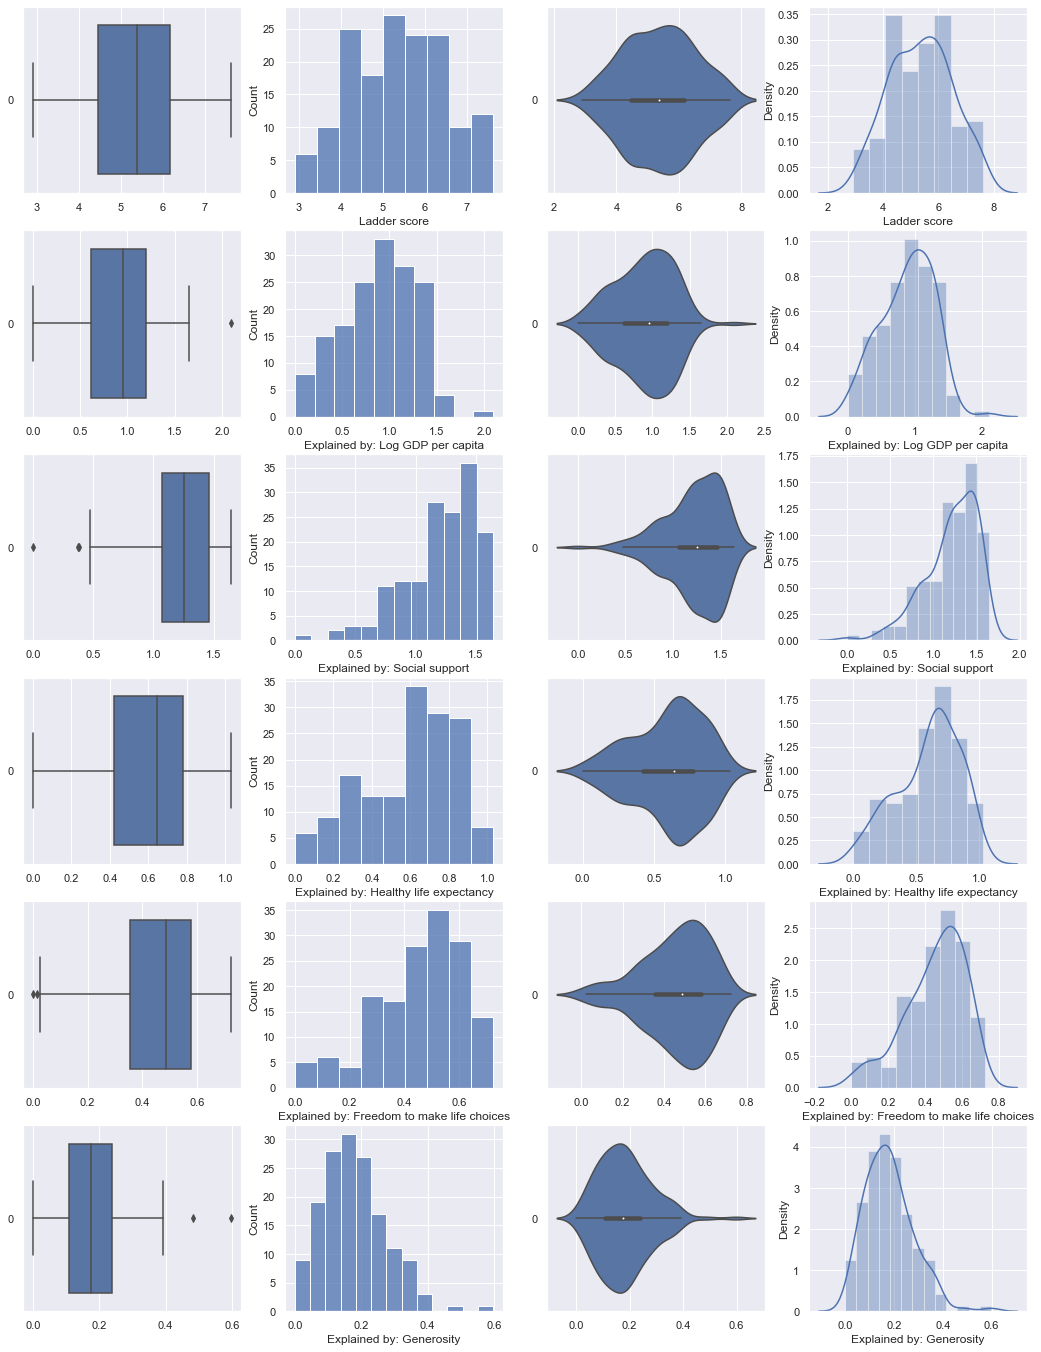

In [35]:
f, axes = plt.subplots(6, 4, figsize=(18, 24))

count = 0
for var in combined2018:
    sb.boxplot(data = happiness2018[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = happiness2018[var], ax = axes[count,1])
    sb.violinplot(data = happiness2018[var], orient = "h", ax = axes[count,2])
    sb.distplot(happiness2018[var], ax = axes[count, 3])
    count += 1

In [36]:
happiness2017 = pd.read_csv('2017 data.csv')
happiness2017.head()

,Country,Regional indicator,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Albania,Central and Eastern Europe,109,4.644,4.752464,4.535536,0.996193,0.803685,0.731160,0.381499,0.201313,0.039864,1.490442
1,Bosnia and Herzegovina,Central and Eastern Europe,90,5.182,5.276336,5.087665,0.982409,1.069336,0.705186,0.204403,0.328867,0.000000,1.892173
2,Bulgaria,Central and Eastern Europe,105,4.714,4.803695,4.624306,1.161459,1.434379,0.708218,0.289232,0.113178,0.011052,0.996139
3,Croatia,Central and Eastern Europe,77,5.293,5.391777,5.194223,1.222556,0.967983,0.701289,0.255772,0.248003,0.043103,1.854492
4,Czech Republic,Central and Eastern Europe,23,6.609,6.683862,6.534138,1.352682,1.433885,0.754444,0.490946,0.088107,0.036873,2.451862


In [37]:
print("Data type : ", type(happiness2017))
print("Data dims : ", happiness2017.shape)
print(happiness2017.dtypes)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (155, 13)
Country                           object
Regional indicator                object
Happiness.Rank                     int64
Happiness.Score                  float64
Whisker.high                     float64
Whisker.low                      float64
Economy..GDP.per.Capita.         float64
Family                           float64
Health..Life.Expectancy.         float64
Freedom                          float64
Generosity                       float64
Trust..Government.Corruption.    float64
Dystopia.Residual                float64
dtype: object


In [38]:
happiness2017.rename(columns = {'Country': 'Country name','Happiness.Score':'Ladder score', 'Whisker.high':'upperwhisker', 'Whisker.low':'lowerwhisker', 'Economy..GDP.per.Capita.':'Explained by: Log GDP per capita', 'Family':'Explained by: Social support', 'Health..Life.Expectancy.':'Explained by: Healthy life expectancy', 'Freedom':'Explained by: Freedom to make life choices', 'Trust..Government.Corruption.':'Explained by: Perceptions of corruption', 'Dystopia.Residual':'Dystopia + residual', 'Generosity':'Explained by: Generosity'}, inplace = True)
happiness2017.head()

,Country name,Regional indicator,Happiness.Rank,Ladder score,upperwhisker,lowerwhisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Albania,Central and Eastern Europe,109,4.644,4.752464,4.535536,0.996193,0.803685,0.731160,0.381499,0.201313,0.039864,1.490442
1,Bosnia and Herzegovina,Central and Eastern Europe,90,5.182,5.276336,5.087665,0.982409,1.069336,0.705186,0.204403,0.328867,0.000000,1.892173
2,Bulgaria,Central and Eastern Europe,105,4.714,4.803695,4.624306,1.161459,1.434379,0.708218,0.289232,0.113178,0.011052,0.996139
3,Croatia,Central and Eastern Europe,77,5.293,5.391777,5.194223,1.222556,0.967983,0.701289,0.255772,0.248003,0.043103,1.854492
4,Czech Republic,Central and Eastern Europe,23,6.609,6.683862,6.534138,1.352682,1.433885,0.754444,0.490946,0.088107,0.036873,2.451862


In [39]:
happiness2017_updated = happiness2017.drop(['Happiness.Rank', 'upperwhisker', 'lowerwhisker', 'Dystopia + residual'], axis=1)

In [40]:
happiness2017_updated.head()

,Country name,Regional indicator,Ladder score,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,Albania,Central and Eastern Europe,4.644,0.996193,0.803685,0.731160,0.381499,0.201313,0.039864
1,Bosnia and Herzegovina,Central and Eastern Europe,5.182,0.982409,1.069336,0.705186,0.204403,0.328867,0.000000
2,Bulgaria,Central and Eastern Europe,4.714,1.161459,1.434379,0.708218,0.289232,0.113178,0.011052
3,Croatia,Central and Eastern Europe,5.293,1.222556,0.967983,0.701289,0.255772,0.248003,0.043103
4,Czech Republic,Central and Eastern Europe,6.609,1.352682,1.433885,0.754444,0.490946,0.088107,0.036873


In [41]:
combined2017 = pd.DataFrame(happiness2017_updated[["Ladder score", "Explained by: Log GDP per capita", "Explained by: Social support", "Explained by: Healthy life expectancy", "Explained by: Freedom to make life choices", "Explained by: Generosity", "Explained by: Perceptions of corruption"]])

# Summary Statistics for all Variables
combined2017.describe()

,Ladder score,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,5.354019,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120
std,1.131230,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661
min,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.505500,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271
50%,5.279000,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848
75%,6.101500,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296
max,7.537000,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308


C:\Users\anusr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\anusr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\anusr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

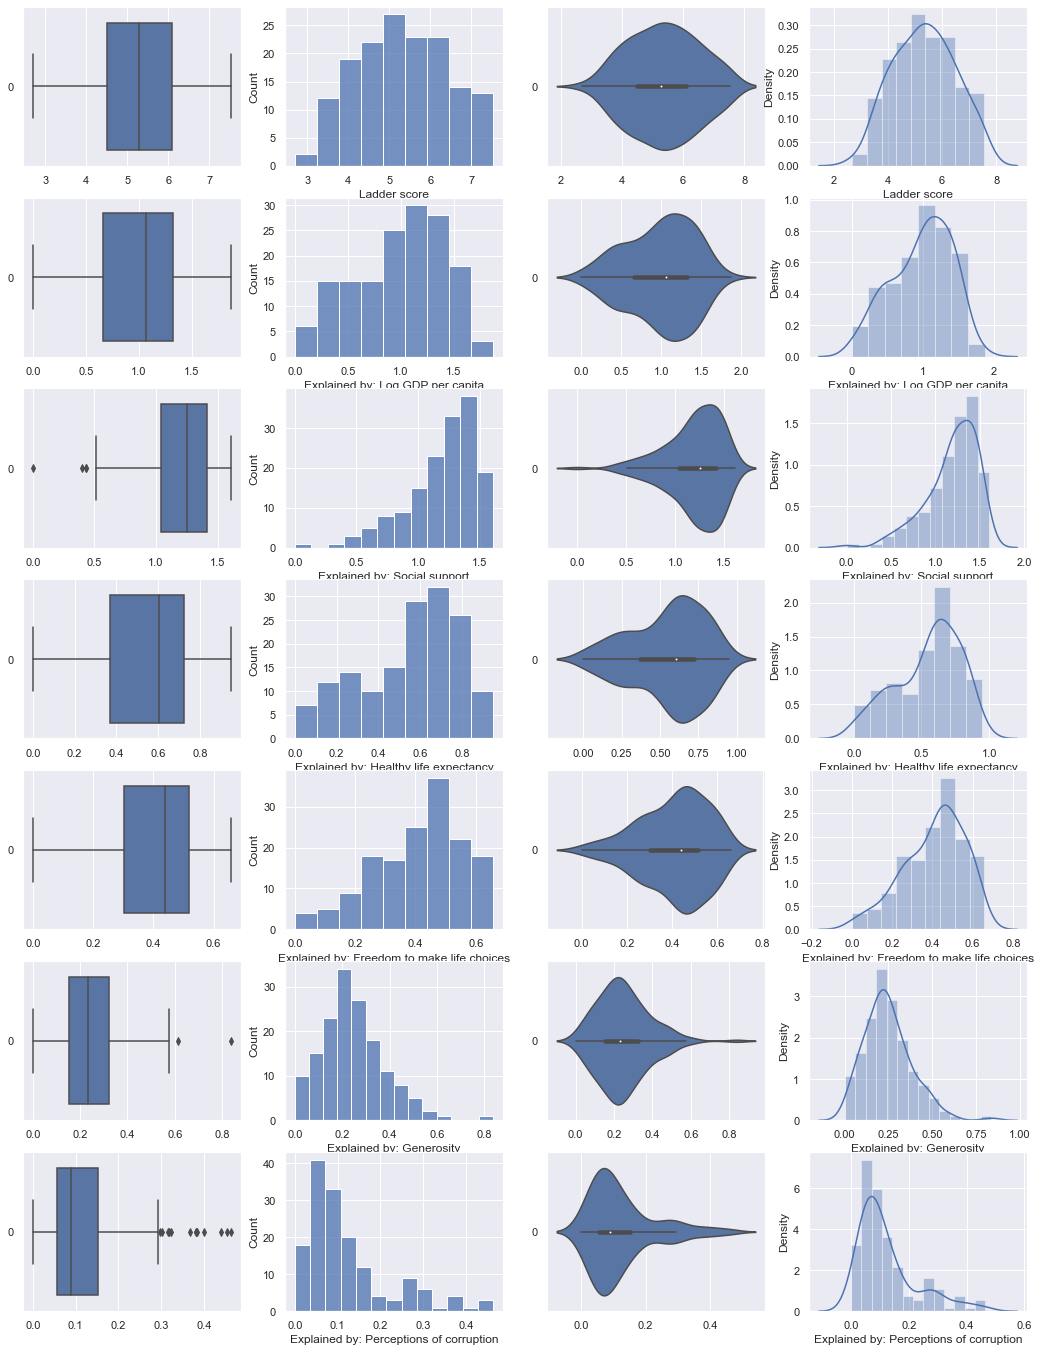

In [42]:
f, axes = plt.subplots(7, 4, figsize=(18, 24))

count = 0
for var in combined2017:
    sb.boxplot(data = happiness2017_updated[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = happiness2017_updated[var], ax = axes[count,1])
    sb.violinplot(data = happiness2017_updated[var], orient = "h", ax = axes[count,2])
    sb.distplot(happiness2017_updated[var], ax = axes[count, 3])
    count += 1

Since the distributions did not change much over the years, we can combine all these data together to have more data points to be used for machine learning later on.

In [43]:
happinessdata = pd.concat([happiness2021_updated, happiness2020_updated, happiness2017_updated, happiness2018, happiness2019])
happinessdata.head()

,Country name,Regional indicator,Ladder score,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Overall rank
0,Albania,Central and Eastern Europe,5.117,1.008,0.529,0.646,0.491,0.168,0.024,NaN
1,Bosnia and Herzegovina,Central and Eastern Europe,5.813,1.032,0.919,0.618,0.395,0.261,0.005,NaN
2,Bulgaria,Central and Eastern Europe,5.266,1.181,1.055,0.583,0.494,0.125,0.005,NaN
3,Croatia,Central and Eastern Europe,5.882,1.251,1.039,0.703,0.453,0.111,0.000,NaN
4,Czech Republic,Central and Eastern Europe,6.965,1.370,1.090,0.703,0.580,0.052,0.046,NaN


In [44]:
print("Data type : ", type(happinessdata))
print("Data dims : ", happinessdata.shape)
print(happinessdata.dtypes)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (769, 10)
Country name                                   object
Regional indicator                             object
Ladder score                                  float64
Explained by: Log GDP per capita              float64
Explained by: Social support                  float64
Explained by: Healthy life expectancy         float64
Explained by: Freedom to make life choices    float64
Explained by: Generosity                      float64
Explained by: Perceptions of corruption       float64
Overall rank                                  float64
dtype: object


In [45]:
happinessdata_updated = happinessdata.drop(['Overall rank'], axis = 1)
happinessdata_updated

,Country name,Regional indicator,Ladder score,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,Albania,Central and Eastern Europe,5.117,1.008,0.529,0.646,0.491,0.168,0.024
1,Bosnia and Herzegovina,Central and Eastern Europe,5.813,1.032,0.919,0.618,0.395,0.261,0.005
2,Bulgaria,Central and Eastern Europe,5.266,1.181,1.055,0.583,0.494,0.125,0.005
3,Croatia,Central and Eastern Europe,5.882,1.251,1.039,0.703,0.453,0.111,0.000
4,Czech Republic,Central and Eastern Europe,6.965,1.370,1.090,0.703,0.580,0.052,0.046
...,...,...,...,...,...,...,...,...,...
151,Portugal,Western Europe,5.693,1.221,1.431,0.999,0.508,0.047,0.025
152,Spain,Western Europe,6.354,1.286,1.484,1.062,0.362,0.153,0.079
153,Sweden,Western Europe,7.343,1.387,1.487,1.009,0.574,0.267,0.373
154,Switzerland,Western Europe,7.480,1.452,1.526,1.052,0.572,0.263,0.343


In [46]:
happinessdata_updated.isnull().values.any()

True

In [47]:
is_NaN = happinessdata_updated.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = happinessdata_updated[row_has_NaN]

print(rows_with_NaN)

            Country name            Regional indicator  Ladder score  \
71  United Arab Emirates  Middle East and North Africa         6.774   

    Explained by: Log GDP per capita  Explained by: Social support  \
71                             2.096                         0.776   

    Explained by: Healthy life expectancy  \
71                                   0.67   

    Explained by: Freedom to make life choices  Explained by: Generosity  \
71                                       0.284                     0.186   

    Explained by: Perceptions of corruption  
71                                      NaN  


Now that we found out one NaN value, we are going to replace the NaN values with the mean of the other 4 years

In [48]:
unitedArabEmirates = happinessdata_updated.loc[happinessdata_updated['Country name'] == 'United Arab Emirates']
unitedArabEmirates

,Country name,Regional indicator,Ladder score,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
70,United Arab Emirates,Middle East and North Africa,6.5610,1.555000,0.860000,0.594000,0.670000,0.236000,0.223000
71,United Arab Emirates,Middle East and North Africa,6.7908,1.431086,1.251171,0.787814,0.652936,0.280656,0.220214
71,United Arab Emirates,Middle East and North Africa,6.6480,1.626343,1.266410,0.726798,0.608345,0.360942,0.324490
71,United Arab Emirates,Middle East and North Africa,6.7740,2.096000,0.776000,0.670000,0.284000,0.186000,NaN
71,United Arab Emirates,Middle East and North Africa,6.8250,1.503000,1.310000,0.825000,0.598000,0.262000,0.182000


In [49]:
MeanForNaN = unitedArabEmirates['Explained by: Perceptions of corruption'].mean()
print(MeanForNaN)

0.23742577049999997


In [50]:
happinessdata_updated['Explained by: Perceptions of corruption'].fillna(value = MeanForNaN, inplace = True)


In [51]:
happinessdata_updated.isnull().values.any()

False

C:\Users\anusr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


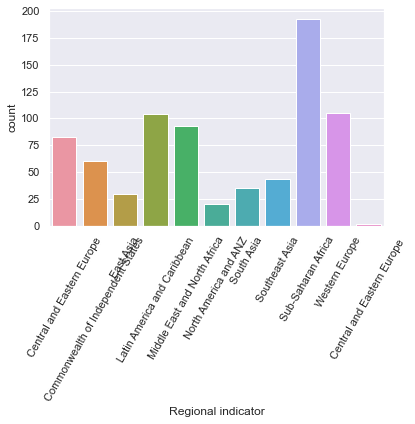

In [52]:
sb.countplot(happinessdata_updated["Regional indicator"])
plt.xticks(rotation = 60)
plt.show()

From this countplot, we are able to find out the number of countries in each region, therefore we know that we are not able to use Central and Eastern Europe, or any regions with too low of a count for machine learning

<AxesSubplot:>

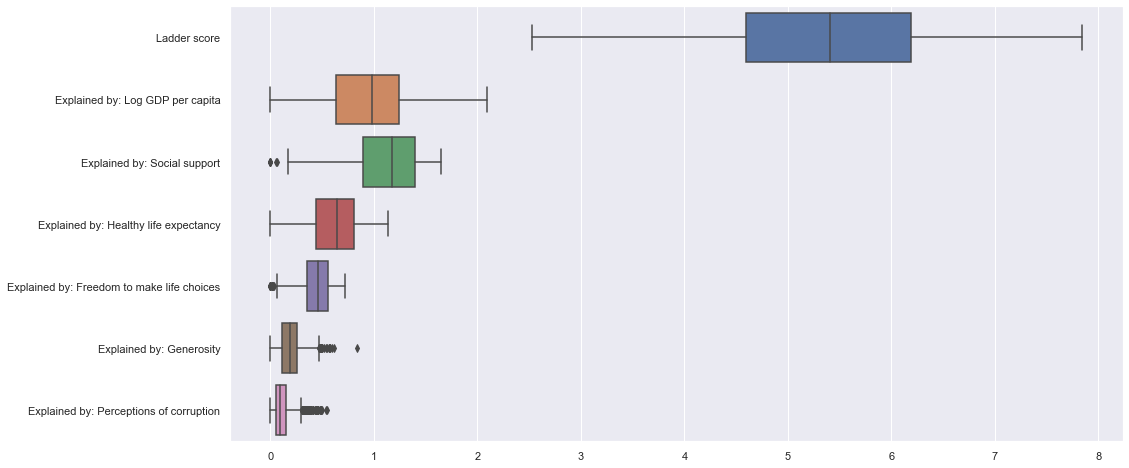

In [53]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(data = happinessdata_updated, orient = "h")

In [54]:
combined_df = pd.DataFrame(happinessdata_updated[["Explained by: Log GDP per capita", "Explained by: Social support", "Explained by: Healthy life expectancy", 'Explained by: Freedom to make life choices', 'Explained by: Perceptions of corruption', 'Explained by: Generosity']])

# Summary Statistics for all Variables
combined_df.describe()

,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Perceptions of corruption,Explained by: Generosity
count,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000
mean,0.925123,1.114605,0.618069,0.443098,0.122329,0.196155
std,0.399678,0.327905,0.251572,0.151837,0.104440,0.109323
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.633617,0.896000,0.441000,0.353000,0.054000,0.116000
50%,0.985000,1.172000,0.646000,0.461000,0.089283,0.185000
75%,1.244000,1.394239,0.806794,0.558733,0.152285,0.256000
max,2.096000,1.644000,1.141000,0.724000,0.547000,0.838075


<AxesSubplot:>

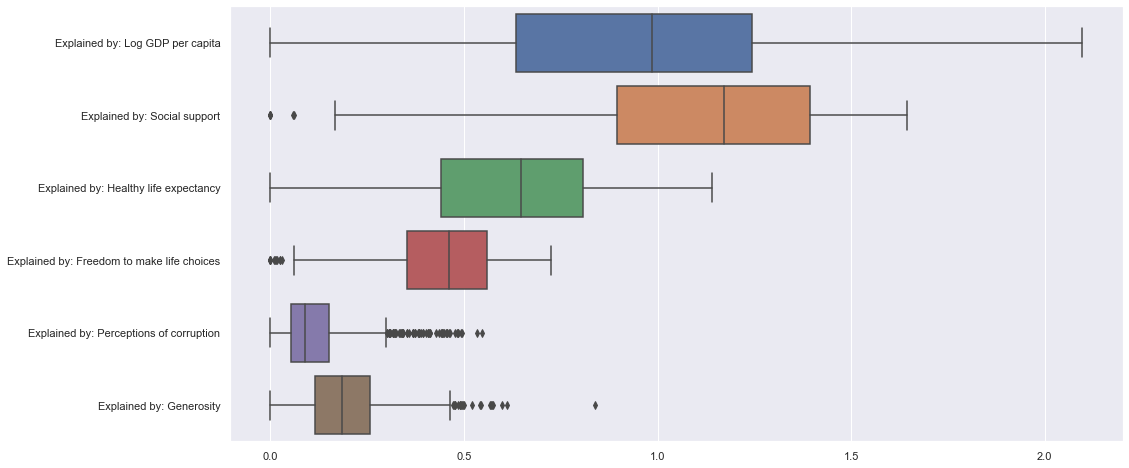

In [55]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(data = combined_df, orient = "h")

C:\Users\anusr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Explained by: Log GDP per capita', ylabel='Density'>

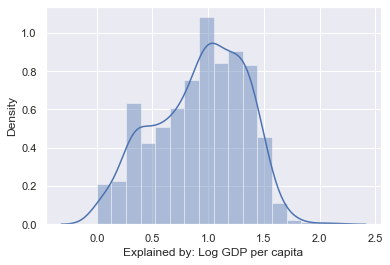

In [56]:

sb.distplot(happinessdata_updated['Explained by: Log GDP per capita'])


In [57]:
LogGDPperCapita = pd.DataFrame(happinessdata_updated["Explained by: Log GDP per capita"])

In [58]:
LogGDPperCapita.skew()

Explained by: Log GDP per capita   -0.314098
dtype: float64

C:\Users\anusr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Explained by: Social support', ylabel='Density'>

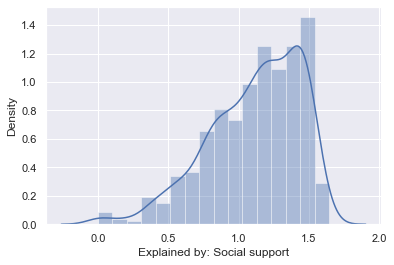

In [59]:
sb.distplot(happinessdata_updated['Explained by: Social support'])



In [60]:
SocialSupport = pd.DataFrame(happinessdata_updated["Explained by: Social support"])
SocialSupport.skew()

Explained by: Social support   -0.801661
dtype: float64

C:\Users\anusr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Explained by: Healthy life expectancy', ylabel='Density'>

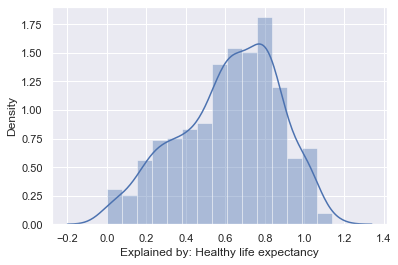

In [61]:
sb.distplot(happinessdata_updated['Explained by: Healthy life expectancy'])


In [62]:
LifeExpectancy = pd.DataFrame(happinessdata_updated["Explained by: Healthy life expectancy"])
LifeExpectancy.skew()

Explained by: Healthy life expectancy   -0.403804
dtype: float64

C:\Users\anusr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Explained by: Freedom to make life choices', ylabel='Density'>

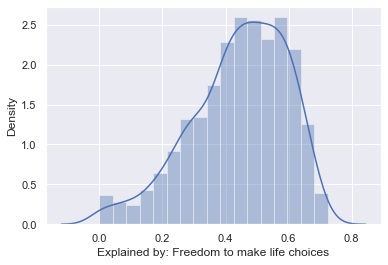

In [63]:
sb.distplot(happinessdata_updated['Explained by: Freedom to make life choices'])



In [64]:
Freedom = pd.DataFrame(happinessdata_updated["Explained by: Freedom to make life choices"])
Freedom.skew()

Explained by: Freedom to make life choices   -0.659143
dtype: float64

C:\Users\anusr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Explained by: Perceptions of corruption', ylabel='Density'>

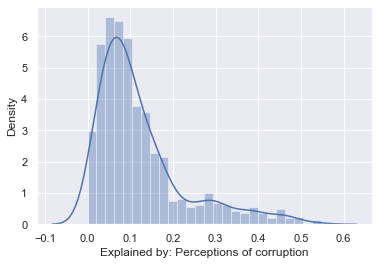

In [65]:
sb.distplot(happinessdata_updated['Explained by: Perceptions of corruption'])


In [66]:
corruption = pd.DataFrame(happinessdata_updated["Explained by: Perceptions of corruption"])
corruption.skew()

Explained by: Perceptions of corruption    1.630195
dtype: float64

In [67]:
happinessdata_updated['Explained by: Perceptions of corruption'] = np.sqrt(happinessdata_updated['Explained by: Perceptions of corruption'])

corruption = pd.DataFrame(happinessdata_updated["Explained by: Perceptions of corruption"])
corruption.skew()

Explained by: Perceptions of corruption    0.628788
dtype: float64

C:\Users\anusr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Explained by: Generosity', ylabel='Density'>

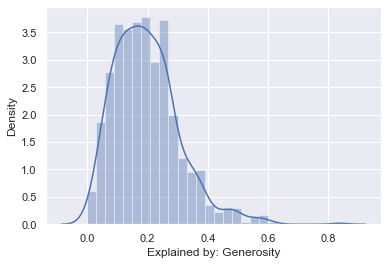

In [68]:
sb.distplot(happinessdata_updated['Explained by: Generosity'])

In [72]:
generosity = pd.DataFrame(happinessdata_updated["Explained by: Generosity"])
generosity.skew()

Explained by: Generosity    1.047219
dtype: float64

In [73]:
central_eastern_europe = happinessdata_updated.loc[happinessdata_updated['Regional indicator'] == 'Central and Eastern Europe']

commonwealth_independent_states = happinessdata_updated.loc[happinessdata_updated['Regional indicator'] == 'Commonwealth of Independent States']

east_asia = happinessdata_updated.loc[happinessdata_updated['Regional indicator'] == 'East Asia']

latin_america_caribbean = happinessdata_updated.loc[happinessdata_updated['Regional indicator'] == 'Latin America and Caribbean']

middle_east_north_africa = happinessdata_updated.loc[happinessdata_updated['Regional indicator'] == 'Middle East and North Africa']

north_america_anz = happinessdata_updated.loc[happinessdata_updated['Regional indicator'] == 'North America and ANZ']

south_asia = happinessdata_updated.loc[happinessdata_updated['Regional indicator'] == 'South Asia']

southeast_asia = happinessdata_updated.loc[happinessdata_updated['Regional indicator'] == 'Southeast Asia']

sub_saharan_africa = happinessdata_updated.loc[happinessdata_updated['Regional indicator'] == 'Sub-Saharan Africa']

western_europe = happinessdata_updated.loc[happinessdata_updated['Regional indicator'] == 'Western Europe']


In [74]:
ladderMeanCentralEurope = commonwealth_independent_states['Ladder score'].mean()
print('Mean for Central and Eastern Europe: ', ladderMeanCentralEurope)

ladderMeanCommonwealth = central_eastern_europe['Ladder score'].mean()
print('Mean for Commonweath Independent States: ', ladderMeanCommonwealth)

ladderMeanCentralEastAsia = east_asia['Ladder score'].mean()
print('Mean for East Asia: ', ladderMeanCentralEastAsia)

ladderMeanLatinAmerica = latin_america_caribbean['Ladder score'].mean()
print('Mean for Latin America Caribbean: ', ladderMeanLatinAmerica)

ladderMeanNorthAfrica = middle_east_north_africa['Ladder score'].mean()
print('Mean for Midle East and North Africa: ', ladderMeanNorthAfrica)

ladderMeanNorthAmerica = north_america_anz['Ladder score'].mean()
print('Mean for North America and ANZ: ', ladderMeanNorthAmerica)

ladderMeanSouthAsia = south_asia['Ladder score'].mean()
print('Mean for South Asia: ', ladderMeanSouthAsia)

ladderMeanSEA = southeast_asia['Ladder score'].mean()
print('Mean for Southeast Asia: ', ladderMeanSEA)

ladderMeanAfrica = sub_saharan_africa['Ladder score'].mean()
print('Mean for Sub-Saharan Africa: ', ladderMeanAfrica)

ladderMeanWesternEurope = western_europe['Ladder score'].mean()
print('Mean for Western Europe: ', ladderMeanWesternEurope)

Mean for Central and Eastern Europe:  5.312484982516668
Mean for Commonweath Independent States:  5.786059046638554
Mean for East Asia:  5.706536644333332
Mean for Latin America Caribbean:  5.950812502326925
Mean for Midle East and North Africa:  5.244889249086023
Mean for North America and ANZ:  7.1815049984499995
Mean for South Asia:  4.5352885547714274
Mean for Southeast Asia:  5.3627568234545455
Mean for Sub-Saharan Africa:  4.312773574450777
Mean for Western Europe:  6.828358096333334


<AxesSubplot:>

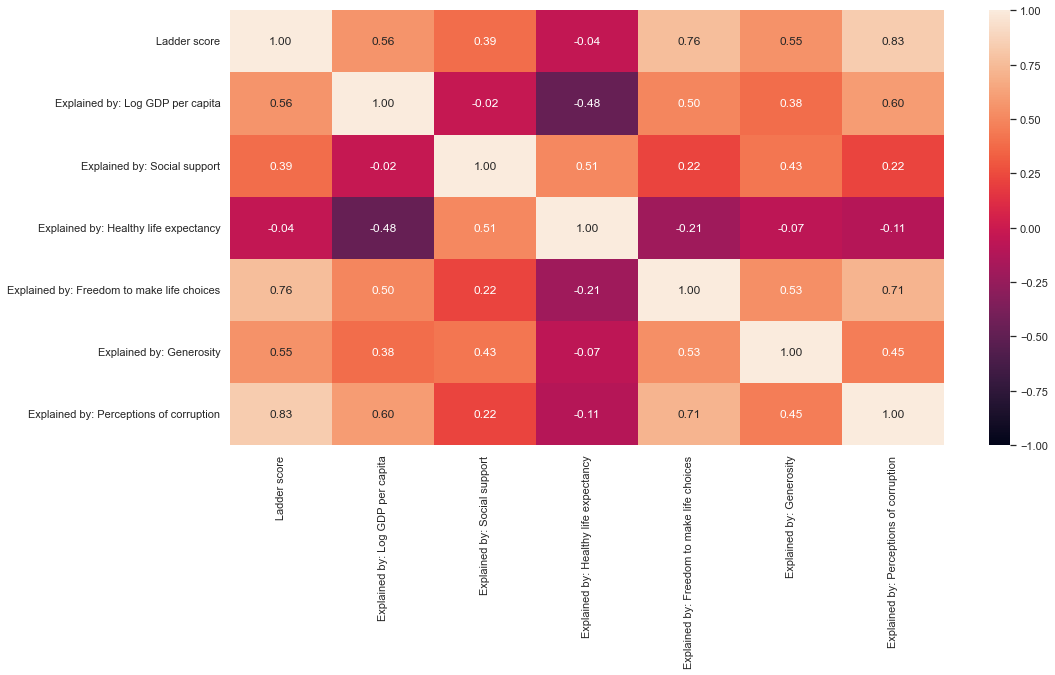

In [75]:
f = plt.figure(figsize = (16, 8))

sb.heatmap(western_europe.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

# Machine Learning
Factor: GDP Train on : Western Europe

# Choosing the best Model(GDP)

# Uni-variate Linear regression

Train Set : (84, 1) (84, 1)
Test Set  : (21, 1) (21, 1)


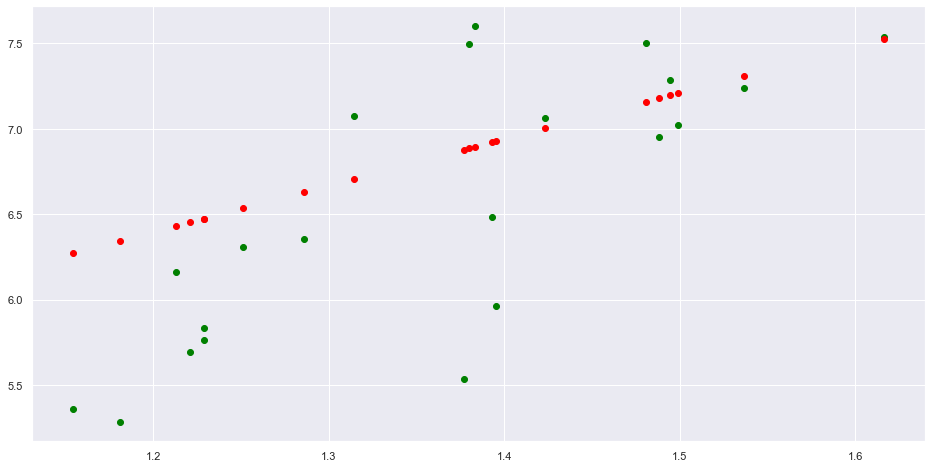

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.23303770782480604
Mean Squared Error (MSE) 	: 0.3348028313428827

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 0.37079328475346474



In [77]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()

# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(western_europe['Ladder score'])
X = pd.DataFrame(western_europe['Explained by: Log GDP per capita'])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

linreg.fit(X_train, y_train)


# Import the required metric from sklearn
from sklearn.metrics import mean_squared_error

# Predict the response on the train set
y_train_pred = linreg.predict(X_train)


from sklearn.metrics import mean_squared_error

y_test_pred = linreg.predict(X_test)

f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green") #actual
plt.scatter(X_test, y_test_pred, color = "red") #predicted
plt.show()



print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Prediction Accuracy of Model \tTest Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Linear regression using random forest

Mean Absolute Error: 0.5779676448955171
Mean Squared Error: 0.47870092236880957
Root Mean Squared Error: 0.6918821593080787


C:\Users\anusr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\anusr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


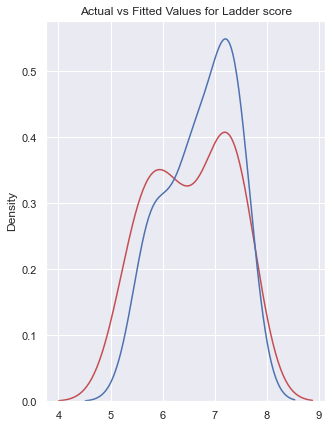

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)
regressor.fit(X_train, y_train.values.ravel())

y_pred = regressor.predict(X_test)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="predicted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Ladder score')


plt.show()
plt.close()

In [80]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
y_train = sc.fit_transform(y_train)
y_test = sc.transform(y_test)

from xgboost import XGBRegressor
regressor  = XGBRegressor()

regressor.fit(X_train, y_train)

Y_pred_test = regressor.predict(X_test)

import xgboost as xgb
from sklearn.metrics import mean_squared_error

data_dmatrix = xgb.DMatrix(data=X_train, label=y_train)
params = {"objective":'reg:squarederror', "colsample_bytree":0.4, "learning_rate":0.1, "max_depth":2, "alpha":10}
xg_m = xgb.train(params=params, dtrain=data_dmatrix)

data_dmatrix_test = xgb.DMatrix(data=X_test)
preds = xg_m.predict(data_dmatrix_test)

print("old MSE")
print((mean_squared_error(preds, y_test)))



import xgboost as xgb
from sklearn.metrics import mean_squared_error

data_dmatrix = xgb.DMatrix(data=X_train, label=y_train)
params = {"objective":'reg:squarederror', "colsample_bytree":0.2, "learning_rate":0.5, "max_depth":4, "alpha":16}
xg_m = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=70)

data_dmatrix_test = xgb.DMatrix(data=X_test)
preds = xg_m.predict(data_dmatrix_test)

print("new MSE")
print((mean_squared_error(preds, y_test)))

old MSE
1.61580948709288
new MSE
1.415628969587986


The best model is random uni variate linear regression, hence we will be using this model to test the effects of GDP on happiness index for the rest of the regions

# Choosing the best model(Corruption)

# Uni-variate linear regression

Train Set : (84, 1) (84, 1)
Test Set  : (21, 1) (21, 1)


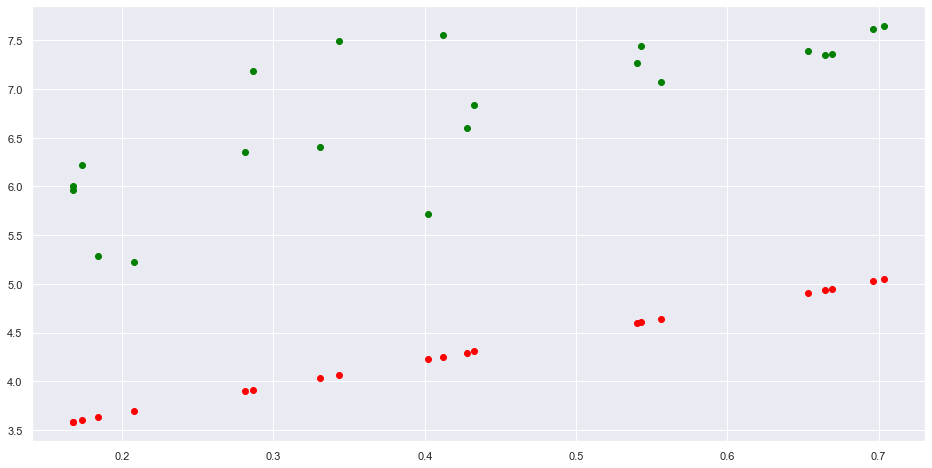

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 6.413991872772046



In [83]:
# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(western_europe['Ladder score'])
X = pd.DataFrame(western_europe['Explained by: Perceptions of corruption'])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

y_test_pred = linreg.predict(X_test)

f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()


# Check the Goodness of Fit (on Test Data)
print("Prediction Accuracy of Model \tTest Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Random Forest regression

Mean Absolute Error: 0.3153325254386149
Mean Squared Error: 0.19180886885218615
Root Mean Squared Error: 0.4379598941138174


C:\Users\anusr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\anusr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


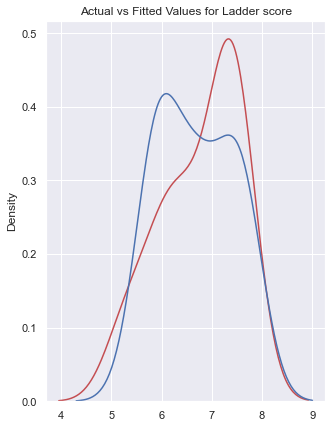

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)
regressor.fit(X_train, y_train.values.ravel())

y_pred = regressor.predict(X_test)

df=pd.DataFrame({ 'Predicted':y_pred})
df

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="predicted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Ladder score')


plt.show()
plt.close()

# Linear regression using XGBoost

In [85]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
y_train = sc.fit_transform(y_train)
y_test = sc.transform(y_test)

from xgboost import XGBRegressor
regressor  = XGBRegressor()

regressor.fit(X_train, y_train)

Y_pred_test = regressor.predict(X_test)

import xgboost as xgb
from sklearn.metrics import mean_squared_error

data_dmatrix = xgb.DMatrix(data=X_train, label=y_train)
params = {"objective":'reg:squarederror', "colsample_bytree":0.4, "learning_rate":0.1, "max_depth":2, "alpha":10}
xg_m = xgb.train(params=params, dtrain=data_dmatrix)

data_dmatrix_test = xgb.DMatrix(data=X_test)
preds = xg_m.predict(data_dmatrix_test)

print("old MSE")
print((mean_squared_error(preds, y_test)))



import xgboost as xgb
from sklearn.metrics import mean_squared_error

data_dmatrix = xgb.DMatrix(data=X_train, label=y_train)
params = {"objective":'reg:squarederror', "colsample_bytree":0.2, "learning_rate":0.5, "max_depth":4, "alpha":16}
xg_m = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=70)

data_dmatrix_test = xgb.DMatrix(data=X_test)
preds = xg_m.predict(data_dmatrix_test)

print("new MSE")
print((mean_squared_error(preds, y_test)))

old MSE
0.9084967843662077
new MSE
0.8007384887278994


The best model is random forest regressor hence we will be using it to test on the rest of the regions to see the effects of corruption on ladder score

# Testing on other regions(GDP)

1) Central and Eastern Europe

TESTING TO SEE THE EFFECTS OF GDP
Train Set : (105, 1) (105, 1)
Test Set  : (83, 1) (83, 1)


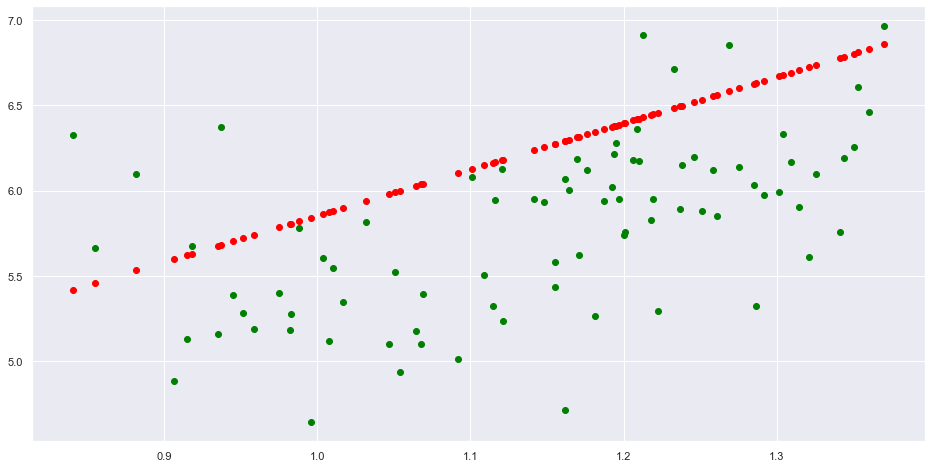

Mean Squared Error (MSE) test set	: 0.3977541931855811


In [86]:
# Import the required function from sklearn
print("TESTING TO SEE THE EFFECTS OF GDP")
X_train=pd.DataFrame(western_europe['Explained by: Log GDP per capita'])
X_test=pd.DataFrame(central_eastern_europe['Explained by: Log GDP per capita'])
y_train=pd.DataFrame(western_europe['Ladder score'])
y_test=pd.DataFrame(central_eastern_europe['Ladder score'])

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

y_test_pred = linreg.predict(X_test)

f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()
print("Mean Squared Error (MSE) test set\t:", mean_squared_error(y_test, y_test_pred))

2)Commonwealth states

Train Set : (105, 1) (105, 1)
Test Set  : (60, 1) (60, 1)


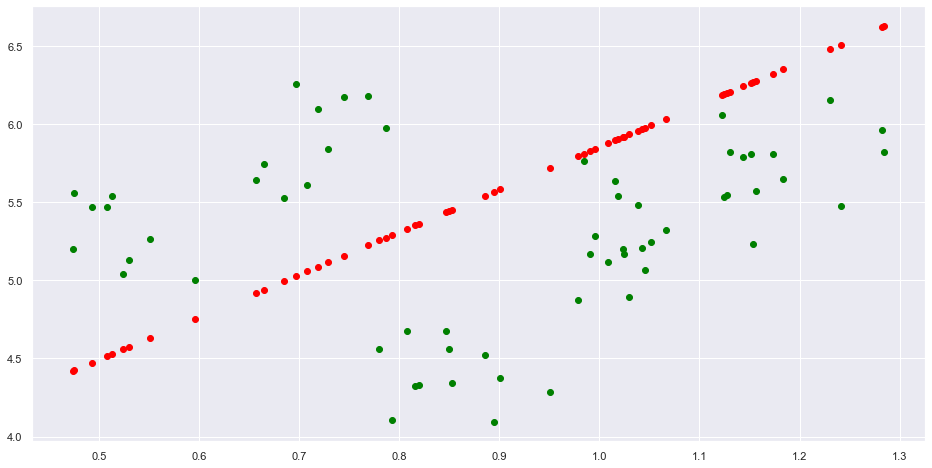

Mean Squared Error (MSE) test set	: 0.6669800133749734


In [87]:
# Import the required function from sklearn

X_train=pd.DataFrame(western_europe['Explained by: Log GDP per capita'])
X_test=pd.DataFrame(commonwealth_independent_states['Explained by: Log GDP per capita'])
y_train=pd.DataFrame(western_europe['Ladder score'])
y_test=pd.DataFrame(commonwealth_independent_states['Ladder score'])

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

y_test_pred = linreg.predict(X_test)

f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()
print("Mean Squared Error (MSE) test set\t:", mean_squared_error(y_test, y_test_pred))


 3) East Asia

Train Set : (105, 1) (105, 1)
Test Set  : (30, 1) (30, 1)


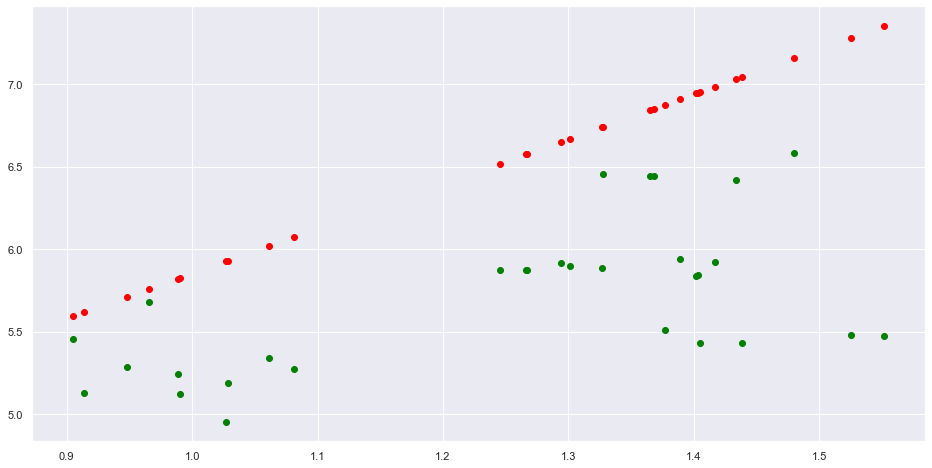

Mean Squared Error (MSE) test set	: 0.8776154117653497


In [88]:
# Import the required function from sklearn

X_train=pd.DataFrame(western_europe['Explained by: Log GDP per capita'])
X_test=pd.DataFrame(east_asia['Explained by: Log GDP per capita'])
y_train=pd.DataFrame(western_europe['Ladder score'])
y_test=pd.DataFrame(east_asia['Ladder score'])

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

y_test_pred = linreg.predict(X_test)

f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()
print("Mean Squared Error (MSE) test set\t:", mean_squared_error(y_test, y_test_pred))


4) lca

Train Set : (105, 1) (105, 1)
Test Set  : (104, 1) (104, 1)


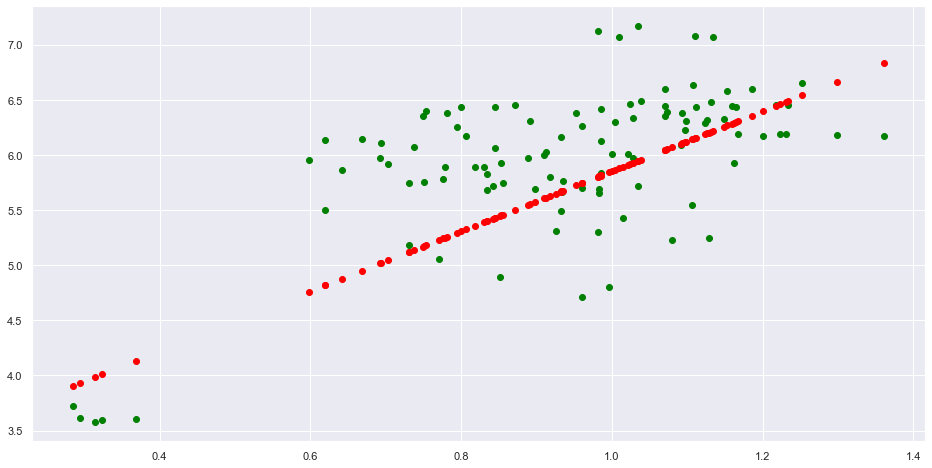

Mean Squared Error (MSE) test set	: 0.3829932540517053


In [89]:
# Import the required function from sklearn

X_train=pd.DataFrame(western_europe['Explained by: Log GDP per capita'])
X_test=pd.DataFrame(latin_america_caribbean['Explained by: Log GDP per capita'])
y_train=pd.DataFrame(western_europe['Ladder score'])
y_test=pd.DataFrame(latin_america_caribbean['Ladder score'])

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

y_test_pred = linreg.predict(X_test)

f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()
print("Mean Squared Error (MSE) test set\t:", mean_squared_error(y_test, y_test_pred))


5) middle east

Train Set : (105, 1) (105, 1)
Test Set  : (93, 1) (93, 1)


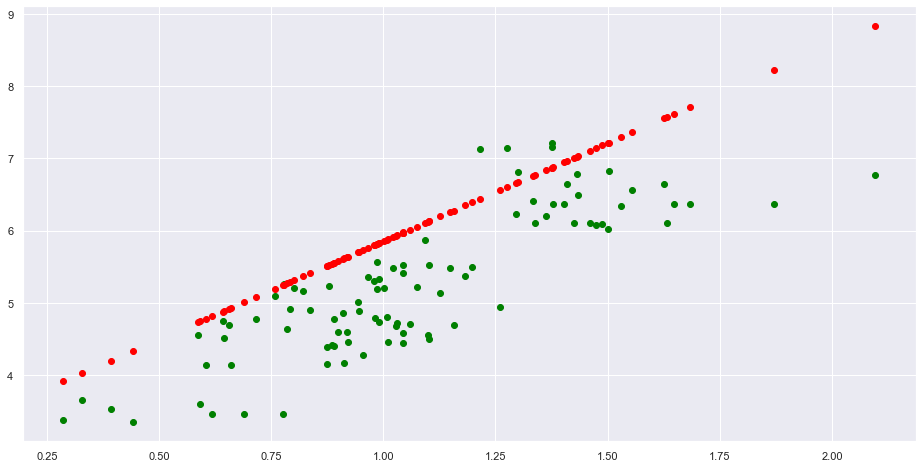

Mean Squared Error (MSE) test set	: 0.9064810797607549


In [90]:
# Import the required function from sklearn

X_train=pd.DataFrame(western_europe['Explained by: Log GDP per capita'])
X_test=pd.DataFrame(middle_east_north_africa['Explained by: Log GDP per capita'])
y_train=pd.DataFrame(western_europe['Ladder score'])
y_test=pd.DataFrame(middle_east_north_africa['Ladder score'])

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

y_test_pred = linreg.predict(X_test)

f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()
print("Mean Squared Error (MSE) test set\t:", mean_squared_error(y_test, y_test_pred))


6) north america and anz

Train Set : (105, 1) (105, 1)
Test Set  : (20, 1) (20, 1)


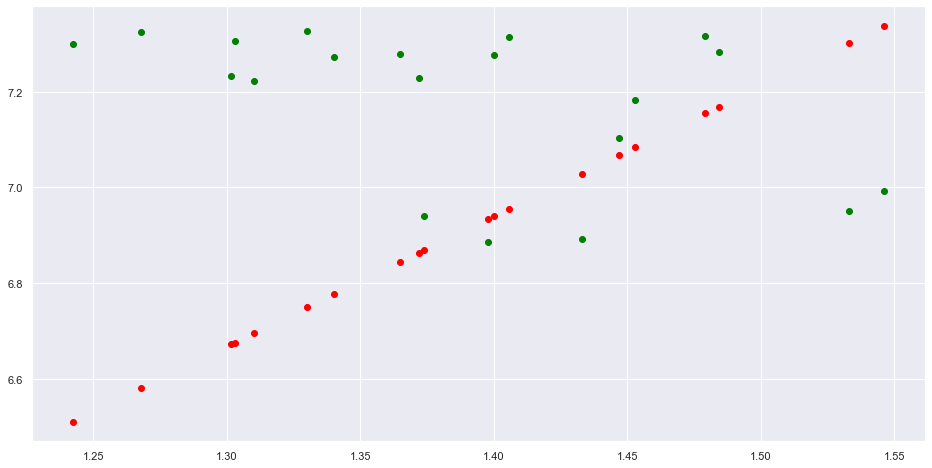

Mean Squared Error (MSE) test set	: 0.18145712176423187


In [91]:
# Import the required function from sklearn

X_train=pd.DataFrame(western_europe['Explained by: Log GDP per capita'])
X_test=pd.DataFrame(north_america_anz['Explained by: Log GDP per capita'])
y_train=pd.DataFrame(western_europe['Ladder score'])
y_test=pd.DataFrame(north_america_anz['Ladder score'])

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

y_test_pred = linreg.predict(X_test)

f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()
print("Mean Squared Error (MSE) test set\t:", mean_squared_error(y_test, y_test_pred))

7) South asia

Train Set : (105, 1) (105, 1)
Test Set  : (35, 1) (35, 1)


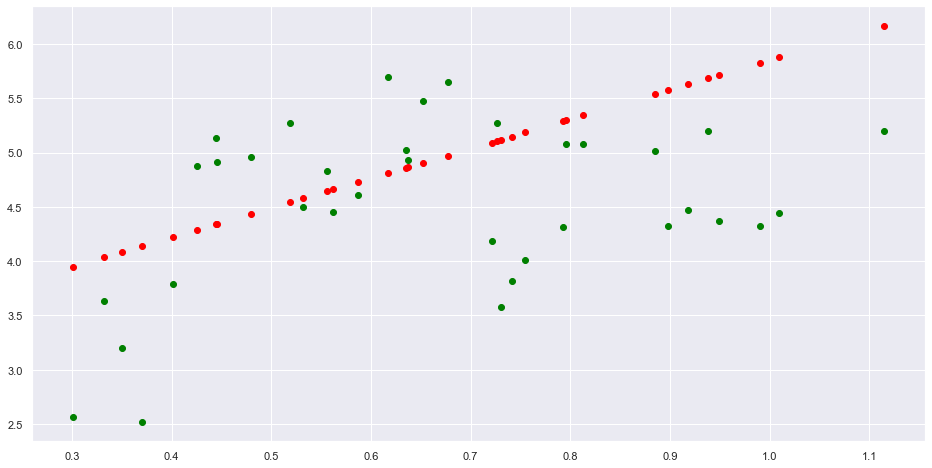

Mean Squared Error (MSE) test set	: 0.781389477724059


In [92]:
# Import the required function from sklearn

X_train=pd.DataFrame(western_europe['Explained by: Log GDP per capita'])
X_test=pd.DataFrame(south_asia['Explained by: Log GDP per capita'])
y_train=pd.DataFrame(western_europe['Ladder score'])
y_test=pd.DataFrame(south_asia['Ladder score'])

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

y_test_pred = linreg.predict(X_test)

f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()
print("Mean Squared Error (MSE) test set\t:", mean_squared_error(y_test, y_test_pred))


8) Southeast Asia

Train Set : (105, 1) (105, 1)
Test Set  : (44, 1) (44, 1)


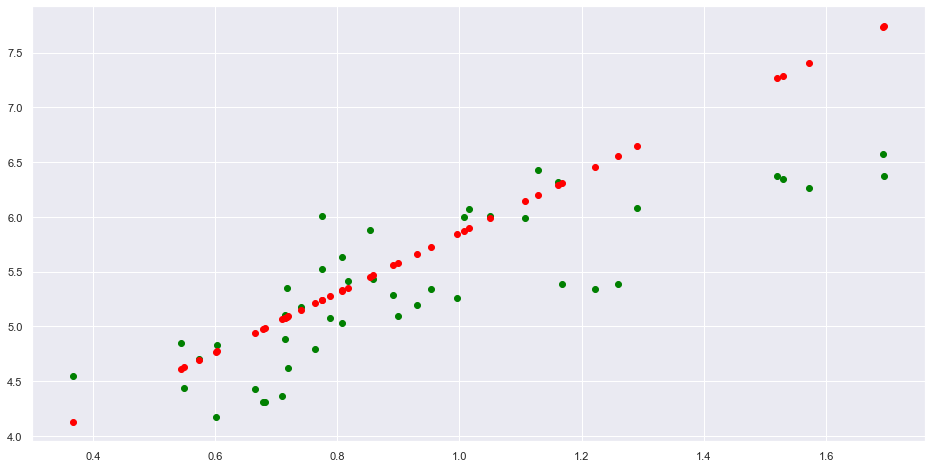

Mean Squared Error (MSE) test set	: 0.3408732818166004


In [93]:
# Import the required function from sklearn

X_train=pd.DataFrame(western_europe['Explained by: Log GDP per capita'])
X_test=pd.DataFrame(southeast_asia['Explained by: Log GDP per capita'])
y_train=pd.DataFrame(western_europe['Ladder score'])
y_test=pd.DataFrame(southeast_asia['Ladder score'])

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

y_test_pred = linreg.predict(X_test)

f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()
print("Mean Squared Error (MSE) test set\t:", mean_squared_error(y_test, y_test_pred))


9) Sub Saharan Africa

Train Set : (105, 1) (105, 1)
Test Set  : (193, 1) (193, 1)


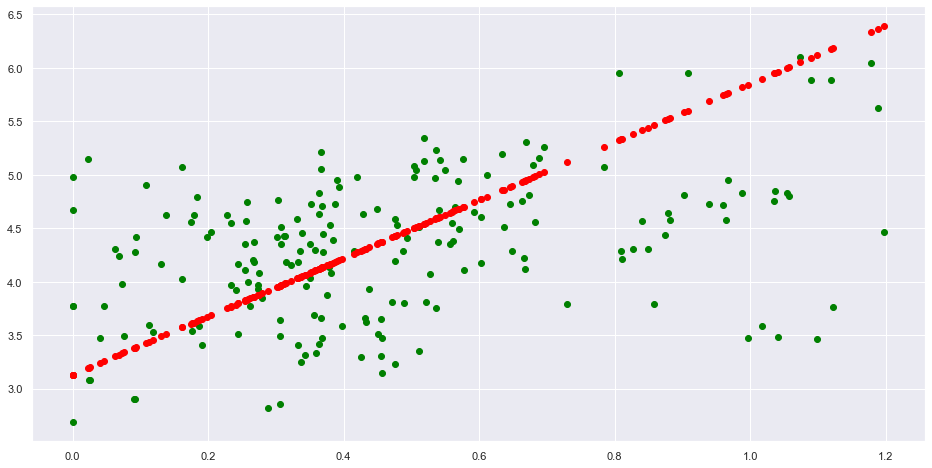

Mean Squared Error (MSE) test set	: 0.6367908358572241


In [94]:
# Import the required function from sklearn

X_train=pd.DataFrame(western_europe['Explained by: Log GDP per capita'])
X_test=pd.DataFrame(sub_saharan_africa['Explained by: Log GDP per capita'])
y_train=pd.DataFrame(western_europe['Ladder score'])
y_test=pd.DataFrame(sub_saharan_africa['Ladder score'])

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

y_test_pred = linreg.predict(X_test)

f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()
print("Mean Squared Error (MSE) test set\t:", mean_squared_error(y_test, y_test_pred))


# Testing effects of corruption on ladder score

1) Central and eastern Europe

Mean Absolute Error: 0.5726995352048356
Mean Squared Error: 0.48328125865941035
Root Mean Squared Error: 0.6951843343023564


C:\Users\anusr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\anusr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


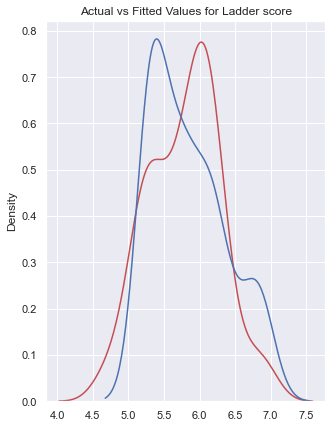

In [95]:
X_train=pd.DataFrame(western_europe['Explained by: Perceptions of corruption'])
X_test=pd.DataFrame(central_eastern_europe['Explained by: Perceptions of corruption'])
y_train=pd.DataFrame(western_europe['Ladder score'])
y_test=pd.DataFrame(central_eastern_europe['Ladder score'])

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)
regressor.fit(X_train, y_train.values.ravel())

y_pred = regressor.predict(X_test)

df=pd.DataFrame({ 'Predicted':y_pred})
df

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="predicted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Ladder score')


plt.show()
plt.close()

2) Commonwealth

Mean Absolute Error: 0.9906238737202021
Mean Squared Error: 1.3877388932324224
Root Mean Squared Error: 1.1780232991042334


C:\Users\anusr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\anusr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


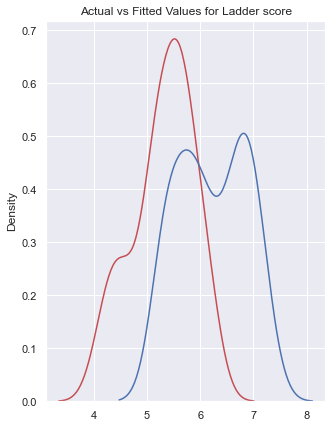

In [96]:
X_train=pd.DataFrame(western_europe['Explained by: Perceptions of corruption'])
X_test=pd.DataFrame(commonwealth_independent_states['Explained by: Perceptions of corruption'])
y_train=pd.DataFrame(western_europe['Ladder score'])
y_test=pd.DataFrame(commonwealth_independent_states['Ladder score'])

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)
regressor.fit(X_train, y_train.values.ravel())

y_pred = regressor.predict(X_test)

df=pd.DataFrame({ 'Predicted':y_pred})
df

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="predicted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Ladder score')


plt.show()
plt.close()

3) East Asia

Mean Absolute Error: 0.9547282252573696
Mean Squared Error: 1.3389953287566008
Root Mean Squared Error: 1.1571496570265234


C:\Users\anusr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\anusr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


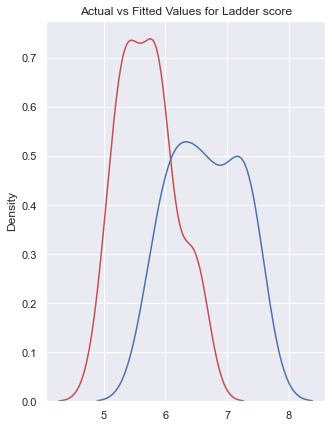

In [97]:
X_train=pd.DataFrame(western_europe['Explained by: Perceptions of corruption'])
X_test=pd.DataFrame(east_asia['Explained by: Perceptions of corruption'])
y_train=pd.DataFrame(western_europe['Ladder score'])
y_test=pd.DataFrame(east_asia['Ladder score'])

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)
regressor.fit(X_train, y_train.values.ravel())

y_pred = regressor.predict(X_test)

df=pd.DataFrame({ 'Predicted':y_pred})
df

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="predicted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Ladder score')


plt.show()
plt.close()

4) LAC

Mean Absolute Error: 0.6654049218987262
Mean Squared Error: 0.8824012937894268
Root Mean Squared Error: 0.9393621739187856


C:\Users\anusr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\anusr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


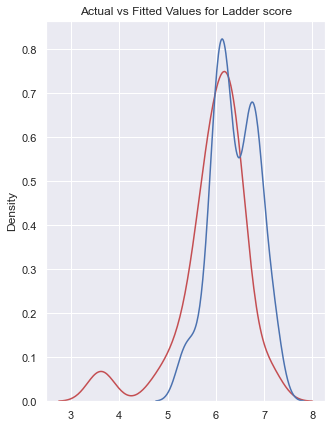

In [98]:
X_train=pd.DataFrame(western_europe['Explained by: Perceptions of corruption'])
X_test=pd.DataFrame(latin_america_caribbean['Explained by: Perceptions of corruption'])
y_train=pd.DataFrame(western_europe['Ladder score'])
y_test=pd.DataFrame(latin_america_caribbean['Ladder score'])

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)
regressor.fit(X_train, y_train.values.ravel())

y_pred = regressor.predict(X_test)

df=pd.DataFrame({ 'Predicted':y_pred})
df

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="predicted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Ladder score')


plt.show()
plt.close()

5) Middle East

Mean Absolute Error: 1.4617922479881291
Mean Squared Error: 2.921547209261751
Root Mean Squared Error: 1.7092534069767862


C:\Users\anusr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\anusr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


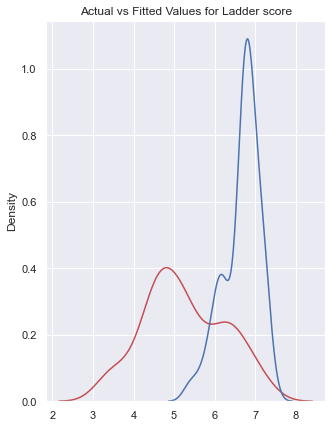

In [99]:
X_train=pd.DataFrame(western_europe['Explained by: Perceptions of corruption'])
X_test=pd.DataFrame(middle_east_north_africa['Explained by: Perceptions of corruption'])
y_train=pd.DataFrame(western_europe['Ladder score'])
y_test=pd.DataFrame(middle_east_north_africa['Ladder score'])

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)
regressor.fit(X_train, y_train.values.ravel())

y_pred = regressor.predict(X_test)

df=pd.DataFrame({ 'Predicted':y_pred})
df

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="predicted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Ladder score')


plt.show()
plt.close()

6) North America ANZ

Mean Absolute Error: 0.1974457093647298
Mean Squared Error: 0.06160325448927777
Root Mean Squared Error: 0.24820002918871256


C:\Users\anusr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\anusr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


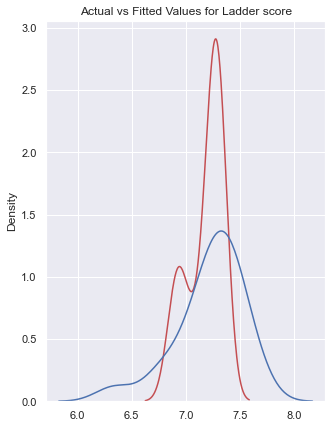

In [100]:
X_train=pd.DataFrame(western_europe['Explained by: Perceptions of corruption'])
X_test=pd.DataFrame(north_america_anz['Explained by: Perceptions of corruption'])
y_train=pd.DataFrame(western_europe['Ladder score'])
y_test=pd.DataFrame(north_america_anz['Ladder score'])

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)
regressor.fit(X_train, y_train.values.ravel())

y_pred = regressor.predict(X_test)

df=pd.DataFrame({ 'Predicted':y_pred})
df

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="predicted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Ladder score')


plt.show()
plt.close()

7) South Asia

Mean Absolute Error: 1.9050421446315036
Mean Squared Error: 4.032400032688341
Root Mean Squared Error: 2.008083671734906


C:\Users\anusr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\anusr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


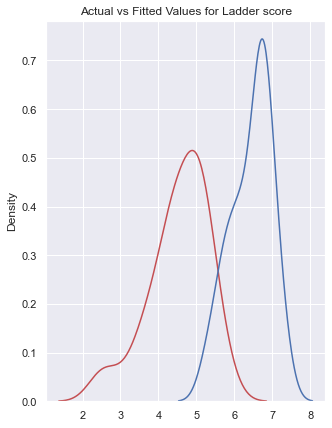

In [101]:
X_train=pd.DataFrame(western_europe['Explained by: Perceptions of corruption'])
X_test=pd.DataFrame(south_asia['Explained by: Perceptions of corruption'])
y_train=pd.DataFrame(western_europe['Ladder score'])
y_test=pd.DataFrame(south_asia['Ladder score'])

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)
regressor.fit(X_train, y_train.values.ravel())

y_pred = regressor.predict(X_test)

df=pd.DataFrame({ 'Predicted':y_pred})
df

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="predicted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Ladder score')


plt.show()
plt.close()

8) Southeast Asia

Mean Absolute Error: 1.126691886313893
Mean Squared Error: 1.745049793141282
Root Mean Squared Error: 1.3210033282097673


C:\Users\anusr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\anusr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


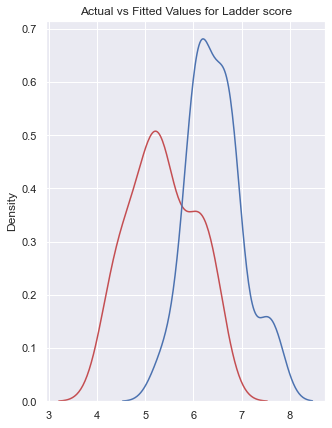

In [102]:
X_train=pd.DataFrame(western_europe['Explained by: Perceptions of corruption'])
X_test=pd.DataFrame(southeast_asia['Explained by: Perceptions of corruption'])
y_train=pd.DataFrame(western_europe['Ladder score'])
y_test=pd.DataFrame(southeast_asia['Ladder score'])

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)
regressor.fit(X_train, y_train.values.ravel())

y_pred = regressor.predict(X_test)

df=pd.DataFrame({ 'Predicted':y_pred})
df

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="predicted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Ladder score')


plt.show()
plt.close()

9) Africa

Mean Absolute Error: 2.190200747843888
Mean Squared Error: 5.55372633316202
Root Mean Squared Error: 2.356634535341027


C:\Users\anusr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\anusr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


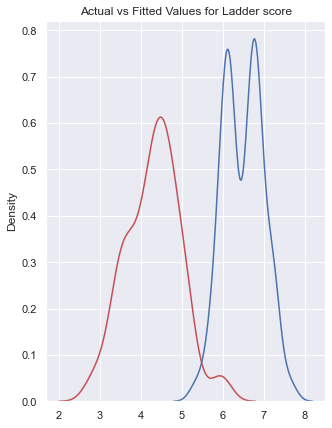

In [103]:
X_train=pd.DataFrame(western_europe['Explained by: Perceptions of corruption'])
X_test=pd.DataFrame(sub_saharan_africa['Explained by: Perceptions of corruption'])
y_train=pd.DataFrame(western_europe['Ladder score'])
y_test=pd.DataFrame(sub_saharan_africa['Ladder score'])

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)
regressor.fit(X_train, y_train.values.ravel())

y_pred = regressor.predict(X_test)

df=pd.DataFrame({ 'Predicted':y_pred})
df

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="predicted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Ladder score')


plt.show()
plt.close()

# Freedom of life choices choosing the best model

In [104]:
freedom_western_europe = pd.DataFrame(western_europe['Explained by: Freedom to make life choices'])
ladderscore_western_europe = pd.DataFrame(western_europe['Ladder score'])

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(freedom_western_europe, ladderscore_western_europe, test_size = 0.2)

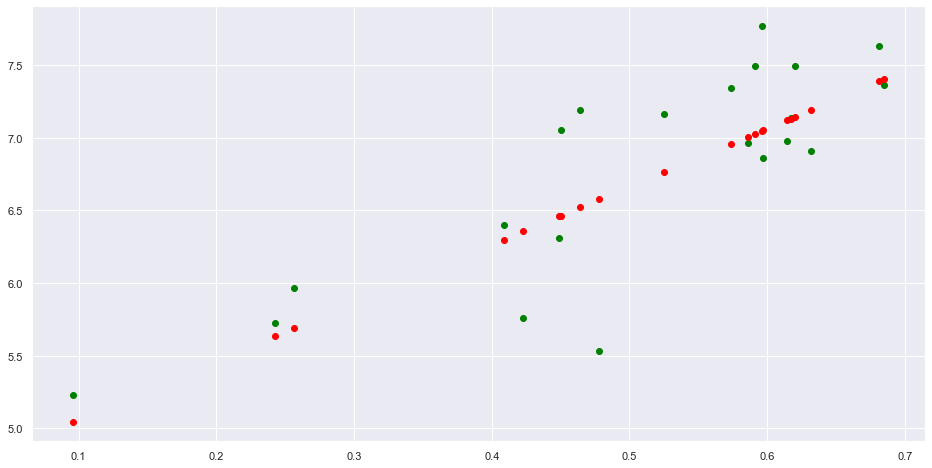

Mean Squared Error (MSE): 0.17815338310769868


In [108]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

linreg = LinearRegression()

linreg.fit(X_train, y_train)

# Formula for the Regression line
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Predict Ladder Score values corresponding to Generosity
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_test_pred))

# Linear Regression using Random Forest

Mean Absolute Error: 0.39423433597748686
Mean Squared Error: 0.24275449269082797
Root Mean Squared Error: 0.4927012205087663


C:\Users\anusr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\anusr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


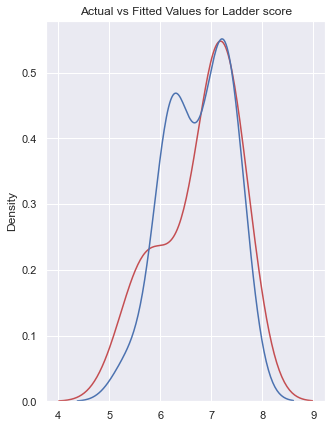

In [111]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)
regressor.fit(X_train, y_train.values.ravel())
    
y_pred = regressor.predict(X_test)
    
df = pd.DataFrame({'Predicted':y_pred})
df.head()
    
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="predicted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Ladder score')


plt.show()
plt.close()

# Linear Regression using XGBoost

In [112]:
import sys
!{sys.executable} -m pip install xgboost
from xgboost import XGBRegressor
regressor = XGBRegressor()

In [113]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
y_train = sc.fit_transform(y_train)
y_test = sc.transform(y_test)
    
regressor  = XGBRegressor()

regressor.fit(X_train, y_train)

Y_pred_train = regressor.predict(X_train)

import xgboost as xgb
from sklearn.metrics import mean_squared_error

data_dmatrix = xgb.DMatrix(data=X_train, label=y_train)
params = {"objective":'reg:squarederror', "colsample_bytree":0.4, "learning_rate":0.1, "max_depth":2, "alpha":10}
xg_m = xgb.train(params=params, dtrain=data_dmatrix)

data_dmatrix_test = xgb.DMatrix(data=X_test)
preds = xg_m.predict(data_dmatrix_test)

print("Mean Squared Error:", np.sqrt(mean_squared_error(preds, y_test)))

Mean Squared Error: 0.880075905101563


In [114]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

data_dmatrix = xgb.DMatrix(data=X_train, label=y_train)
params = {"objective":'reg:squarederror', "colsample_bytree":0.2, "learning_rate":0.5, "max_depth":4, "alpha":16}
xg_m = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=70)

data_dmatrix_test = xgb.DMatrix(data=X_test)
preds = xg_m.predict(data_dmatrix_test)

print("Mean Squared Error:" , np.sqrt(mean_squared_error(preds, y_test)))

Mean Squared Error: 0.7995367581546478


# Comparing the Mean Sqaured Error (MSE) for the 3 models:

Univariate Linear Regression Test - 0.178                                                                        
Random Forest - 0.243                                                                                           
XGBoost - 0.800

Since the Univariate Linear Regression Test model has the lowest mean squared error, we will be using this model to test on all other regions.

# # Univariate Linear Regression Test on all regions


TRAIN on Western Europe

TEST on:

Central and Eastern Europe
Commonwealth of Independent States
East Asia
Latin America and Caribbean
Middle East and North Africa
North America and ANZ
South Asia
Southeast Asia
Sub-Saharan Africa
Western Europe

Central and Eastern Europe

Mean Squared Error (MSE): 0.5252990049745385


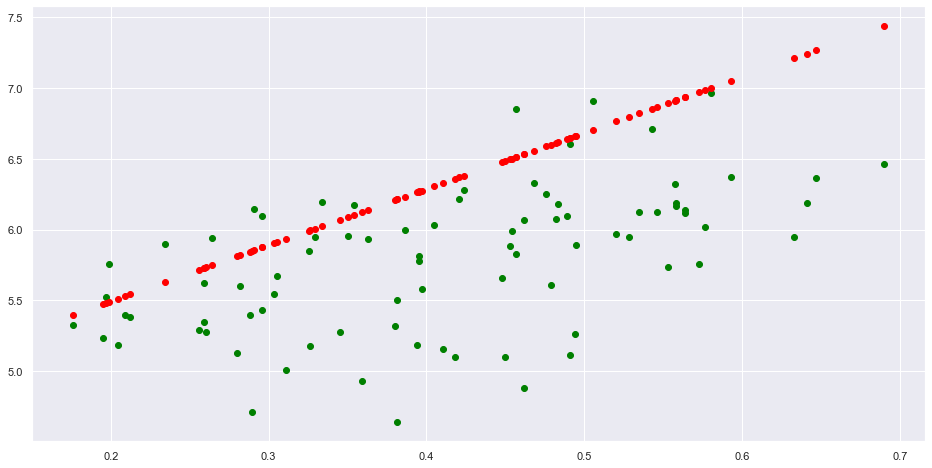

Commonwealth of Independent States

Mean Squared Error (MSE): 1.3900689924631788


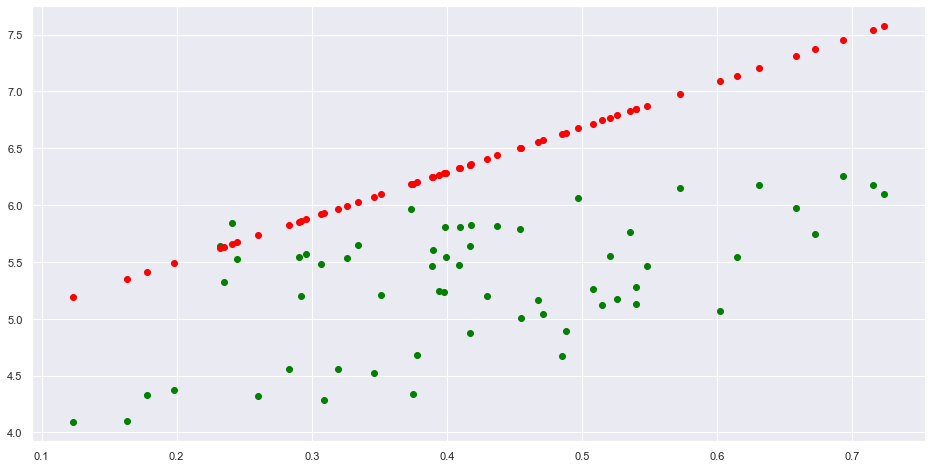

East Asia

Mean Squared Error (MSE): 0.9658919040315622


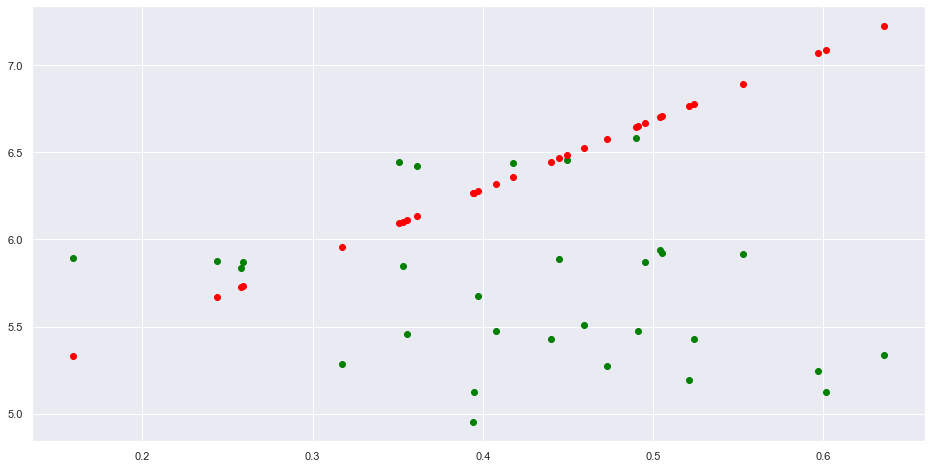

Latin America and Caribbean

Mean Squared Error (MSE): 0.7151377790634506


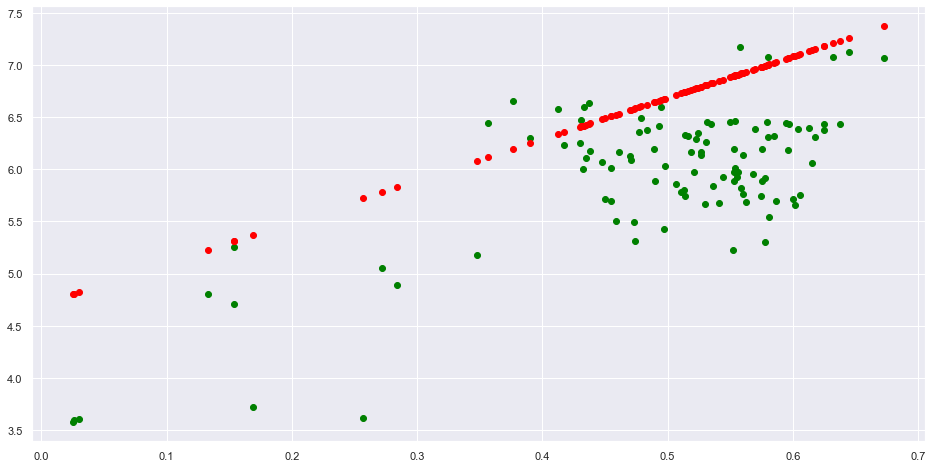

Middle East and North Africa

Mean Squared Error (MSE): 1.2780810335314294


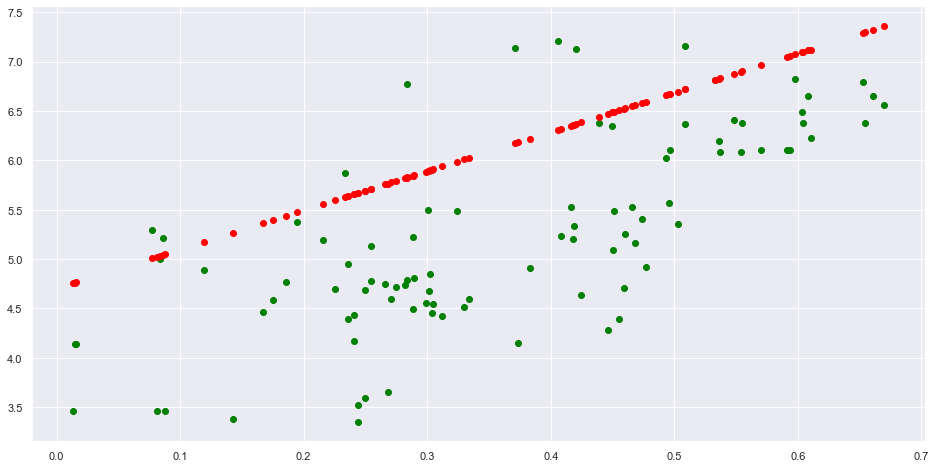

North America and ANZ

Mean Squared Error (MSE): 0.032589376882676865


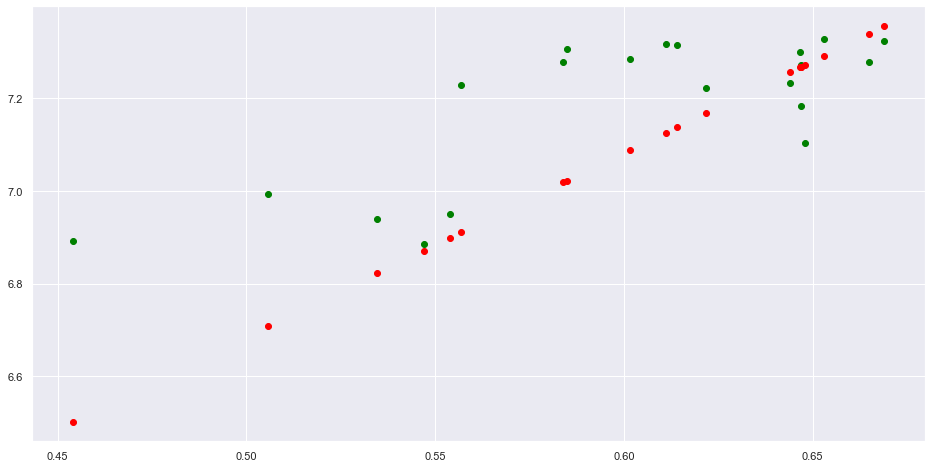

South Asia

Mean Squared Error (MSE): 4.059849212604447


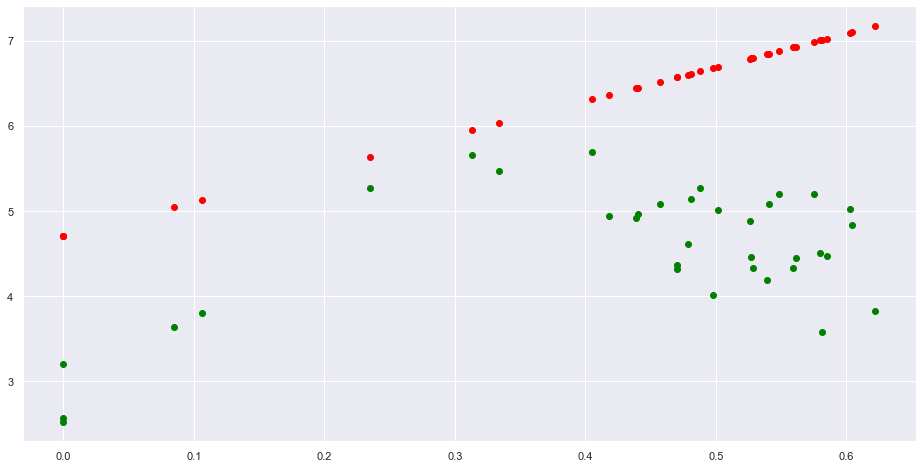

Southeast Asia

Mean Squared Error (MSE): 3.3715721200153754


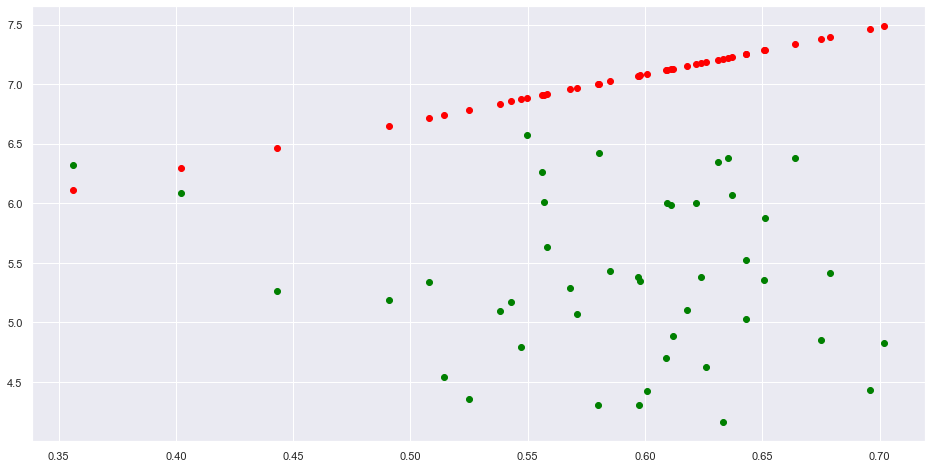

Sub-Saharan Africa

Mean Squared Error (MSE): 4.118458681516785


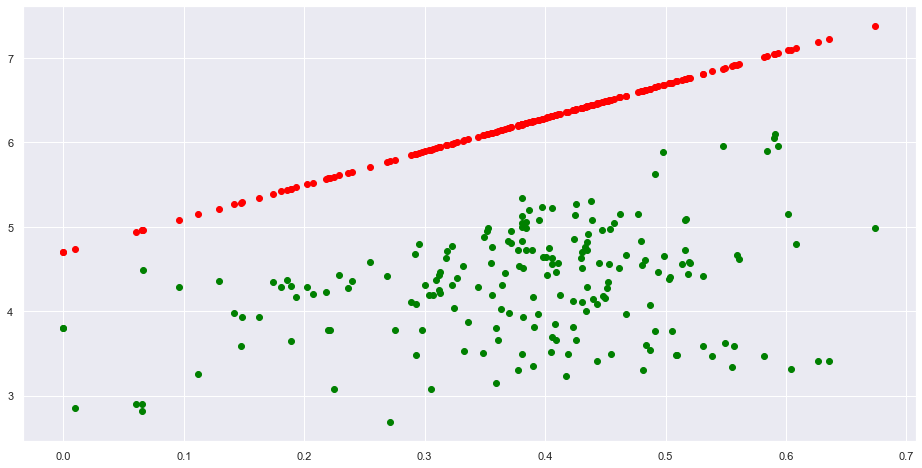

Western Europe

Mean Squared Error (MSE): 0.20483719629714192


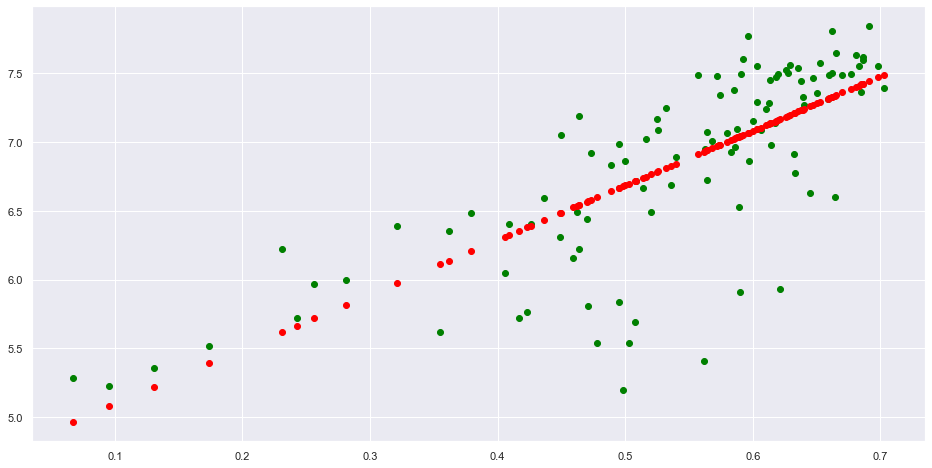

In [118]:
regions = [central_eastern_europe, commonwealth_independent_states, east_asia, latin_america_caribbean, middle_east_north_africa, north_america_anz, south_asia, southeast_asia, sub_saharan_africa, western_europe]

for var in regions:
    y_train = pd.DataFrame(western_europe['Ladder score'])
    y_test=pd.DataFrame(var['Ladder score'])

    X_train= pd.DataFrame(western_europe['Explained by: Freedom to make life choices'])
    X_test=pd.DataFrame(var['Explained by: Freedom to make life choices'])
    
    linreg = LinearRegression()

    linreg.fit(X_train, y_train)

    # Formula for the Regression line
    regline_x = X_train
    regline_y = linreg.intercept_ + linreg.coef_ * X_train

    # Predict Ladder Score values corresponding to Generosity
    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)
    
    if var is central_eastern_europe : print("Central and Eastern Europe")
    if var is commonwealth_independent_states : print("Commonwealth of Independent States")
    if var is east_asia : print("East Asia")
    if var is latin_america_caribbean : print("Latin America and Caribbean")
    if var is middle_east_north_africa : print("Middle East and North Africa")
    if var is north_america_anz : print("North America and ANZ")
    if var is south_asia : print("South Asia")
    if var is southeast_asia : print("Southeast Asia")
    if var is sub_saharan_africa : print("Sub-Saharan Africa")
    if var is western_europe : print("Western Europe")

    print('')
    print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_test_pred))
    
    # Plot the Predictions on a Scatterplot
    f = plt.figure(figsize=(16, 8))
    plt.scatter(X_test, y_test, color = "green")
    plt.scatter(X_test, y_test_pred, color = "red")
    plt.show()

Code adapted from

https://towardsdatascience.com/how-to-use-pca-tsne-xgboost-and-finally-bayesian-optimization-to-predict-the-price-of-houses-626dbaf242ae
https://towardsdatascience.com/random-forest-ca80e56224c1